<h3 align="center">IMPLEMENTACIÓN DE ANÁLISIS MULTICRITERIO (SMCE) PARA LA LOCALIZACIÓN DE LÍNEAS DE TENSIÓN EN EL MUNICIPIO DE PUENTE NACIONAL - SANTANDER, COLOMBIA👩🏼‍🏭💡</h3>
<h5 align="center">Workshop 6. Análisis Multicriterio<em></em></h5>
<h6 align="center">Parte. No. 1</h6>

**Presentado por:** 
> Megan García Antivar 👾
> 
> María Fernanda López 👾

**Curso:** Geoprocesamiento- Maestría en Geomática, Universidad Nacional de Colombia

### A. Introducción

La localización de infraestructura energética como las líneas de tensión, implica decisiones complejas que requieren la integración de múltiples criterios espaciales, técnicos, sociales y ambientales. En este contexto, el Análisis Multicriterio Espacial (SMCE, por sus siglas en inglés) se ha consolidado como una metodología robusta para apoyar procesos de toma de decisiones territoriales bajo condiciones de incertidumbre y conflicto de intereses (Malczewski, 1999; Jankowski, 1995).

El SMCE combina diversas capas de información geoespacial mediante técnicas de evaluación multicriterio, permitiendo identificar áreas más adecuadas para ciertos usos o intervenciones. Dentro de esta metodología, el *Spatial Multi-Criteria Analysis* (SMCA) constituye la fase operativa del proceso, centrada en la estandarización de variables, asignación de pesos y agregación espacial de criterios (Geneletti, 2005). 

El presente ejercicio implementa un modelo SMCE para determinar zonas con mayor conveniencia territorial para el desarrollo de proyectos de líneas de tensión en el municipio de Puente Nacional (Boyacá)🚧, considerando criterios de tipo físico-ambiental, de infraestructura, sociales y normativos. Este enfoque busca no solo maximizar la viabilidad técnica de la intervención, sino también reducir los conflictos socioambientales mediante una planificación territorial informada y transparente.

---

**Referencias:**

- Geneletti, D. (2005). *Multicriteria analysis to compare the impact of alternative road corridors: a case study in northern Italy*. *Impact Assessment and Project Appraisal*, 23(2), 135–146.  
- Jankowski, P. (1995). *Integrating geographical information systems and multiple criteria decision-making methods*. *International Journal of Geographical Information Systems*, 9(3), 251–273.  
- Malczewski, J. (1999). *GIS and Multicriteria Decision Analysis*. John Wiley & Sons.

### B. Objetivos

#### Objetivo general
Identificar las zonas con mayor conveniencia territorial para el desarrollo de proyectos de líneas de tensión en el municipio de Puente Nacional (Boyacá), mediante la implementación de un modelo de Análisis Multicriterio Espacial (SMCE) que integre criterios físico-ambientales, de infraestructura, sociales y normativos.

---

#### Objetivos específicos

**1.** Diseñar un árbol de criterios jerárquico, integrando variables físico-ambientales, sociales, normativas y de infraestructura relevantes para la localización de líneas de tensión.

**2.** Recolectar, procesar y estandarizar capas espaciales, ajustando sus valores a una escala común que permita su integración dentro del modelo multicriterio.

**3.** Asignar pesos relativos a los criterios definidos y aplicar un modelo de agregación espacial para calcular un índice de conveniencia territorial.

**4.** Clasificar y representar los resultados del análisis, identificando las zonas más adecuadas para el desarrollo de infraestructura eléctrica en el territorio municipal.

## 0. Importar liberías

En esta sección se instalan y agrupan las librerías requeridas para el desarrollo del análisis multicriterio espacial (SMCE). La clasificación se realiza con base en su funcionalidad principal:

In [98]:
# Instalación necesaria para visualizaciones interactivas
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [197]:
#Procesamiento y análisis geoespacial
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.features import rasterize
from rasterio.warp import calculate_default_transform, reproject, Resampling
import fiona
import contextily as ctx

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap, BoundaryNorm, to_rgb, to_hex
from matplotlib import colormaps
import plotly.graph_objects as go

#Análisis y manipulación numérica
import numpy as np
import pandas as pd
from scipy import ndimage

#Utilidades adcionales
import os
import warnings
import textwrap
from shapely.geometry import mapping
from graphviz import Digraph
from IPython.display import Image

# Estructura jerárquica del problema de decisión (SMCE)

| Nivel jerárquico       | Elemento                                           | Ejemplo específico                                      |
|------------------------|----------------------------------------------------|---------------------------------------------------------|
| **Problema de decisión** | Localización optima de líneas de tensión         | Municipio de Puente Nacional (Boyacá)                  |
| **Objetivos**          | Minimizar impactos y maximizar viabilidad territorial | Infraestructura viable, bajo impacto social y ambiental |
| **Criterios / Atributos** | Físico-ambiental<br>Infraestructura<br>Social<br>Normativo | DEM, drenajes, vías, centros poblados, POT             |
| **Parámetros**         | - Pendiente (DEM)<br>- Drenajes<br>- Biomas<br>- Líneas de transmisión<br>- Red vial<br>- Proximidad a centros poblados<br>- Vulnerabilidad<br>- Áreas protegidas, etc. | Capas raster o vectoriales estandarizadas               |

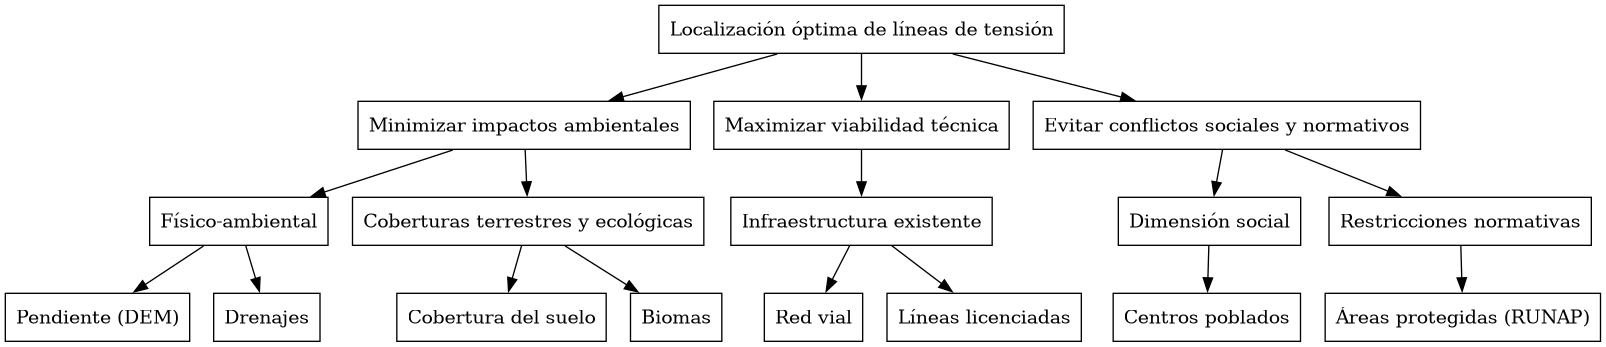

In [196]:
# Diagrama 
dot = Digraph(comment='Árbol jerárquico SMCE ajustado', format='png')
dot.attr(size='60,35')
dot.attr('node', shape='box')

# Nivel 1: Problema de decisión
dot.node('P', 'Localización óptima de líneas de tensión')

# Nivel 2: Objetivos generales
dot.node('O1', 'Minimizar impactos ambientales')
dot.node('O2', 'Maximizar viabilidad técnica')
dot.node('O3', 'Evitar conflictos sociales y normativos')
dot.edges([('P', 'O1'), ('P', 'O2'), ('P', 'O3')])

# Nivel 3: Criterios por objetivo
dot.node('C1', 'Físico-ambiental')
dot.node('C2', 'Coberturas terrestres y ecológicas')
dot.node('C3', 'Infraestructura existente')
dot.node('C4', 'Dimensión social')
dot.node('C5', 'Restricciones normativas')
dot.edges([('O1', 'C1'), ('O1', 'C2'),
           ('O2', 'C3'),
           ('O3', 'C4'), ('O3', 'C5')])

# Nivel 4: Parámetros específicos
dot.node('P1', 'Pendiente (DEM)')
dot.node('P2', 'Drenajes')
dot.node('P3', 'Cobertura del suelo')
dot.node('P4', 'Biomas')
dot.node('P5', 'Red vial')
dot.node('P6', 'Líneas licenciadas')
dot.node('P7', 'Centros poblados')
dot.node('P8', 'Áreas protegidas (RUNAP)')
dot.edges([('C1', 'P1'), ('C1', 'P2'),
           ('C2', 'P3'), ('C2', 'P4'),
           ('C3', 'P5'), ('C3', 'P6'),
           ('C4', 'P7'),
           ('C5', 'P8')])

# Renderizar y mostrar
dot.render('arbol_smce_ajustado', format='png', cleanup=False)
Image(filename='arbol_smce_ajustado.png')

## 1. Exploración de datos

En esta sección se realiza la exploración inicial de todas las capas espaciales disponibles para el análisis multicriterio, con el objetivo de comprender su estructura, atributos clave y potencial uso dentro del modelo SMCE.

La exploración abarca tanto capas vectoriales como ráster, agrupadas según su naturaleza temática: físico-ambiental, infraestructura, social y normativa. Para cada capa se documenta:

- Su origen y formato.
- Los campos o atributos disponibles.
- Los valores únicos relevantes (para capas categóricas).
- Posibles inconsistencias o elementos a depurar.
- Interpretación preliminar de su utilidad como criterio o restricción en el modelo.

Este paso es fundamental para establecer la viabilidad técnica de cada insumo, definir criterios de estandarización, y construir un árbol jerárquico sólido y justificable.

> **Nota:** En esta etapa no se realizan aún procesos de normalización ni ponderación, sino una caracterización descriptiva detallada que servirá de base para las siguientes fases del análisis.

### 1.1. Físico-ambiental

El componente físico-ambiental del análisis considera variables naturales que influyen directamente en la viabilidad técnica y ambiental del trazado de líneas de tensión. En esta etapa se exploran dos insumos principales: el Modelo de Elevación Digital (DEM) y la red hidrográfica del municipio, ambos con un rol clave en el modelo SMCE.

Dado que muchas de las capas utilizadas en este análisis cubren la totalidad del territorio nacional o tienen una área a la que se considera dentro de este análisis, se aplica una máscara geográfica basada en el límite oficial del municipio de Puente Nacional (Boyacá), con el fin de restringir el análisis únicamente al área de interés.

Esta máscara se implementa como primer paso dentro de la fase de exploración, y se utiliza para recortar tanto capas vectoriales como ráster, garantizando consistencia espacial, reducción de carga computacional y relevancia territorial del análisis.

#### 1.1.1. Modelo de Elevación Digital (DEM)

El modelo de elevación utilizado en este análisis corresponde al formato `.hgt` proveniente de la misión SRTM (Shuttle Radar Topography Mission), que ofrece datos de altitud con una resolución espacial de 1 arc-second (aproximadamente 30 metros). Este formato es ampliamente utilizado en estudios de modelado topográfico y puede ser leído directamente como ráster mediante librerías como `rasterio`.

Para su exploración inicial se inspeccionaron las dimensiones del archivo, el sistema de referencia espacial, y se calcularon estadísticas básicas (mínimo, máximo, media y desviación estándar de la elevación). También se generaron representaciones visuales mediante `matplotlib` para verificar su cobertura y detectar posibles artefactos o celdas nulas.

El propósito principal de este insumo es derivar un modelo de pendiente que refleje los condicionamientos geomorfológicos del territorio. Esta pendiente será utilizada como criterio físico-técnico en el modelo SMCE, considerando que las zonas con mayor inclinación pueden representar mayores costos de construcción o riesgos estructurales para la instalación de líneas de tensión.


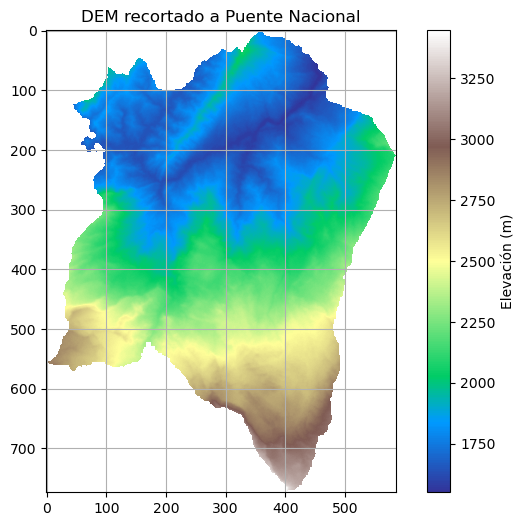

In [14]:
# Extraer la capa y convertir a float
dem_data = out_image[0].astype("float32")

# Identificar valores nulos (celdas fuera del límite municipal)
dem_data[dem_data <= 0] = np.nan

# Visualizar con colormap topográfico
plt.figure(figsize=(8, 6))
plt.imshow(dem_data, cmap="terrain")
plt.title("DEM recortado a Puente Nacional")
plt.axis("on")
plt.colorbar(label="Elevación (m)")
plt.grid(True)
plt.show()

In [20]:
with rasterio.open("data/dem_puente_nacional.tif") as dem_src:
    print("Información del DEM recortado:")
    print(f"- CRS: {dem_src.crs}")
    print(f"- Resolución: {dem_src.res}")
    print(f"- Dimensiones: {dem_src.width} columnas x {dem_src.height} filas")
    print(f"- Tipo de dato: {dem_src.dtypes[0]}")
    
    # Leer y convertir a float para permitir NaN
    data = dem_src.read(1).astype("float32")
    data[data <= 0] = np.nan  # Ignorar nodata o valores inválidos
    
    # Estadísticas básicas
    print(f"- Elevación mínima: {np.nanmin(data):.2f} m")
    print(f"- Elevación máxima: {np.nanmax(data):.2f} m")
    print(f"- Tamaño total: {data.shape}")

Información del DEM recortado:
- CRS: EPSG:4326
- Resolución: (0.0002777777777777778, 0.0002777777777777778)
- Dimensiones: 586 columnas x 774 filas
- Tipo de dato: int16
- Elevación mínima: 1551.00 m
- Elevación máxima: 3448.00 m
- Tamaño total: (774, 586)


##### 1.1.1.1. Histograma (DEM)

El Modelo de Elevación Digital (DEM) de Puente Nacional fue recortado a partir de una fuente SRTM (.hgt), con una resolución de 1 arc-second (~30 m) y sistema de coordenadas EPSG:4326. Esta capa corresponde a uno de los criterios físico-ambientales más relevantes para el modelo SMCE, pues permite derivar variables como pendiente y visibilidad.

A continuación se presenta una visualización exploratoria que incluye un histograma de elevación para observar la distribución altitudinal del territorio.

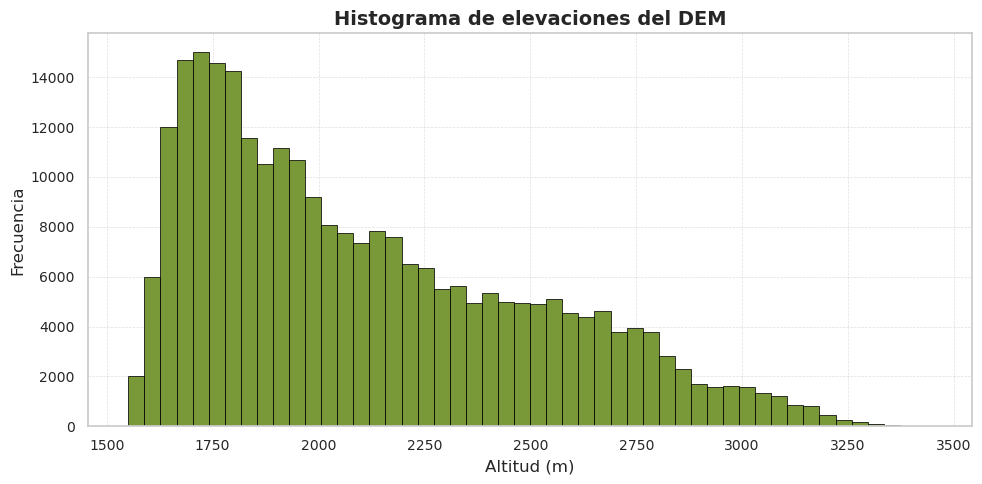

In [38]:
# Leer el DEM desde archivo
with rasterio.open("data/dem_puente_nacional.tif") as dem_src:
    data = dem_src.read(1).astype("float32")
    data[data <= 0] = np.nan  # Ignorar valores inválidos

# Aplicar estilo Seaborn
sns.set(style="whitegrid")

# Parámetros estéticos adicionales
rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

# HISTOGRAMA DE ELEVACIONES
plt.figure(figsize=(10, 5))
plt.hist(
    data[~np.isnan(data)].flatten(),
    bins=50,
    color="olivedrab",
    edgecolor="black",
    linewidth=0.6,
    alpha=0.9
)

# Títulos y etiquetas
plt.title("Histograma de elevaciones del DEM", fontweight="bold")
plt.xlabel("Altitud (m)")
plt.ylabel("Frecuencia")

# Retícula
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# Ajustes finales
plt.tight_layout()
plt.show()

El anterior histograma muestra la distribución de altitudes del municipio de Puente Nacional a partir del DEM recortado. A continuación se presenta su interpretación:

| Aspecto                        | Observación                                                                 |
|-------------------------------|------------------------------------------------------------------------------|
| Rango de elevaciones          | Altitudes entre aproximadamente 1.550 m y 3.400 m.                          |
| Distribución                  | Asimétrica positiva, con mayor densidad en altitudes bajas.                |
| Pico de frecuencia            | Rango entre 1.700 m y 1.800 m.                                              |
| Altitudes predominantes       | Entre 1.600 m y 2.000 m.                                                    |
| Altitudes poco frecuentes     | Altitudes por encima de 3.000 m son menos representadas.                   |
| Posibles implicaciones        | Relieve montañoso puede implicar restricciones constructivas.              |

##### 1.1.1.2. Reproyección del DEM

Para garantizar la precisión de los cálculos derivados del Modelo de Elevación Digital (DEM), como la pendiente o la orientación, es necesario trabajar en un sistema de coordenadas proyectado. El DEM original se encuentra en EPSG:4326 (grados decimales), lo cual no es adecuado para cálculos que requieren unidades métricas.

En este caso se reproyecta el DEM a EPSG:3116 – MAGNA-SIRGAS / Colombia Oeste, que utiliza metros como unidad y es apropiado para el análisis espacial en el territorio de Puente Nacional.

Este paso asegura que las derivadas geomorfológicas tengan sentido físico y espacialmente correcto.

In [41]:
# Entradas y salidas
input_dem = "data/dem_puente_nacional.tif"
output_dem_3116 = "data/dem_puente_nacional_epsg3116.tif"

# Código EPSG destino
dst_crs = "EPSG:3116"

# Reproyección
with rasterio.open(input_dem) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(output_dem_3116, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.bilinear
            )

##### 1.1.1.3. Cálculo de pendiente

Una vez reproyectado el DEM a un sistema métrico, se calcula el ángulo de inclinación del terreno (pendiente) en grados. La pendiente es un insumo crucial en el análisis multicriterio, ya que influye directamente en la viabilidad técnica, el costo de construcción y los riesgos asociados al terreno.

A continuación se presenta el mapa de pendientes y su histograma.

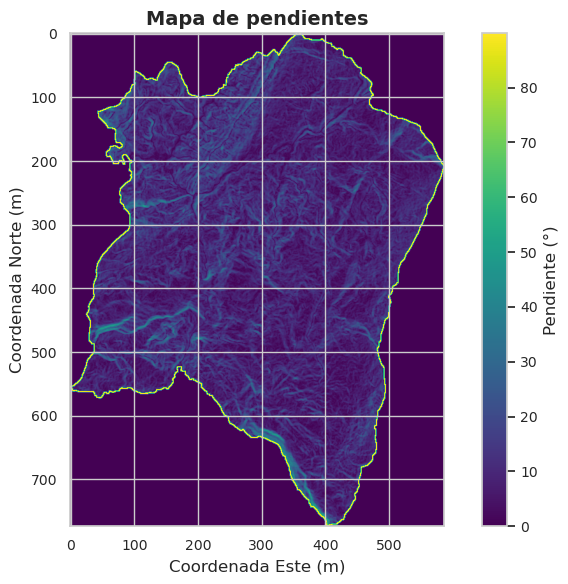

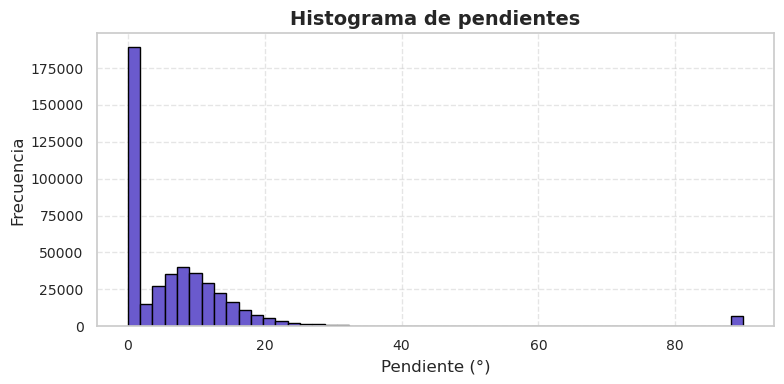

In [46]:
# Leer DEM reproyectado
with rasterio.open("data/dem_puente_nacional_epsg3116.tif") as src:
    dem = src.read(1).astype("float32")
    transform = src.transform
    res_x = transform.a  # tamaño de celda en X
    res_y = -transform.e  # tamaño de celda en Y (negativo, por eso se invierte)

# Calcular gradientes
dzdx = ndimage.sobel(dem, axis=1) / (8 * res_x)
dzdy = ndimage.sobel(dem, axis=0) / (8 * res_y)

# Calcular pendiente (en grados)
slope = np.degrees(np.arctan(np.sqrt(dzdx**2 + dzdy**2)))

# Visualización del mapa de pendientes
plt.figure(figsize=(8, 6))
plt.imshow(slope, cmap="viridis")
plt.colorbar(label="Pendiente (°)")
plt.title("Mapa de pendientes",fontweight="bold")
plt.xlabel("Coordenada Este (m)")
plt.ylabel("Coordenada Norte (m)")
plt.tight_layout()
plt.show()

# Histograma de pendientes
plt.figure(figsize=(8, 4))
plt.hist(slope[~np.isnan(slope)].flatten(), bins=50, color="slateblue", edgecolor="black")
plt.title("Histograma de pendientes", fontweight="bold")
plt.xlabel("Pendiente (°)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 👆🏼Interpretación del histograma de pendientes

El histograma de pendientes muestra la distribución de los valores de inclinación del terreno expresados en grados. A partir del análisis visual, se pueden identificar los siguientes patrones:

| Observación | Descripción |
|-------------|-------------|
| Distribución sesgada | La mayoría de los valores de pendiente se concentran en los primeros rangos (entre 0° y 15°), lo que indica que el territorio de Puente Nacional presenta predominio de terrenos planos a ligeramente inclinados. |
| Pico pronunciado en 0° | Existe una barra muy alta correspondiente a pendientes cercanas a 0°, lo cual puede asociarse a zonas topográficamente planas o a celdas con valores nulos o efecto de interpolación. |
| Disminución progresiva | A medida que aumenta la pendiente, disminuye la frecuencia de aparición, siendo escasos los valores superiores a 30°. |
| Presencia de valores extremos | Se observa una pequeña agrupación en el rango más alto (>85°), lo cual podría deberse a artefactos del modelo, bordes de interpolación o errores locales. |

Este análisis preliminar indica que aunque hay sectores con pendientes medias y altas, una proporción significativa del territorio es apta para desarrollos que requieren condiciones topográficas suaves.

##### 1.1.1.4. Clasificación de pendientes según ANLA

La clasificación de la pendiente es una etapa fundamental en el análisis geomorfológico del territorio, ya que permite traducir valores continuos de inclinación en categorías interpretativas útiles para la toma de decisiones ambientales, de planificación y gestión del territorio.

En este proyecto se adopta la clasificación definida por la **Autoridad Nacional de Licencias Ambientales (ANLA)** bajo el dominio *Dom_PenSuelo*, que segmenta el rango de pendientes en 9 clases, cada una con una descripción estándar. Esta clasificación es ampliamente utilizada en estudios de impacto ambiental, ordenamiento territorial y evaluación de aptitud de suelos en Colombia.

La siguiente tabla describe las clases utilizadas:

| Clase | Rango de pendiente (%) | Rango aproximado (°) | Descripción                          |
|-------|------------------------|-----------------------|--------------------------------------|
| 1     | 0–1 %                  | 0–0.57°               | A nivel                              |
| 2     | 1–3 %                  | 0.57–1.72°            | Ligeramente plana                    |
| 3     | 3–7 %                  | 1.72–4.00°            | Ligeramente inclinada                |
| 4     | 7–12 %                 | 4.00–6.84°            | Moderadamente inclinada              |
| 5     | 12–25 %                | 6.84–14.04°           | Fuertemente inclinada                |
| 6     | 25–50 %                | 14.04–26.57°          | Ligeramente escarpada                |
| 7     | 50–75 %                | 26.57–36.87°          | Moderadamente escarpada              |
| 8     | 75–100 %               | 36.87–45.00°          | Fuertemente escarpada                |
| 9     | >100 %                 | >45.00°               | Totalmente escarpada                 |

> Nota: El rango en grados se estimó aplicando la función arco tangente (`arctan`) al porcentaje de pendiente, asumiendo un modelo de pendiente simple. Esta conversión permite una clasificación precisa usando valores angulares derivados del DEM reproyectado.

Esta clasificación permite estandarizar la interpretación del relieve y facilita su uso en procesos técnicos como la evaluación de aptitud territorial, el ordenamiento ambiental del territorio o la localización de infraestructura sensible a las condiciones topográficas.

A continuación, se aplica esta clasificación al raster de pendientes calculado previamente.

In [3]:
# Cargar raster de pendiente en grados
with rasterio.open("data/pendiente_grados.tif") as src:
    pendiente_data = src.read(1).astype("float32")
    pendiente_data[pendiente_data <= 0] = np.nan  # Evitar valores no válidos

# Definir los límites en grados (aproximados a partir de la clasificación ANLA en %)
bins = [0, 0.57, 1.72, 4.00, 6.84, 14.04, 26.57, 36.87, 45.00, np.inf]
labels = list(range(1, 10))  # Clases de 1 a 9

# Aplanar y clasificar
pendiente_flat = pendiente_data.flatten()
clasificada = pd.cut(pendiente_flat, bins=bins, labels=labels, right=False)

# Calcular porcentaje por clase
valores, counts = np.unique(clasificada.codes[~clasificada.isna()], return_counts=True)
porcentajes = (counts / counts.sum()) * 100

#Categorías ANLA
descripciones = [
    "A nivel",
    "Ligeramente plana",
    "Ligeramente inclinada",
    "Moderadamente inclinada",
    "Fuertemente inclinada",
    "Ligeramente escarpada",
    "Moderadamente escarpada",
    "Fuertemente escarpada",
    "Totalmente escarpada"
]

# Construir DataFrame de resumen
tabla_anla = pd.DataFrame({
    "Clase": [i for i in range(1, 10)],
    "Descripción": descripciones,
    "Porcentaje del área (%)": np.round(porcentajes, 2)
})

# Mostrar tabla
print(tabla_anla)

   Clase              Descripción  Porcentaje del área (%)
0      1                  A nivel                     0.13
1      2        Ligeramente plana                     1.49
2      3    Ligeramente inclinada                     7.65
3      4  Moderadamente inclinada                    18.41
4      5    Fuertemente inclinada                    48.99
5      6    Ligeramente escarpada                    18.84
6      7  Moderadamente escarpada                     1.60
7      8    Fuertemente escarpada                     0.28
8      9     Totalmente escarpada                     2.62


##### 🗺️ Visualización del mapa clasificado de pendientes

El siguiente mapa representa la reclasificación del modelo de pendientes según los rangos establecidos por la ANLA. Cada celda del raster se ha asignado a una de las nueve clases previamente definidas, permitiendo identificar visualmente las zonas con diferentes niveles de inclinación del terreno en el municipio de Puente Nacional.

La leyenda asociada facilita la interpretación del relieve, con categorías que van desde áreas totalmente planas (clase 1) hasta zonas abruptamente escarpadas (clase 9).

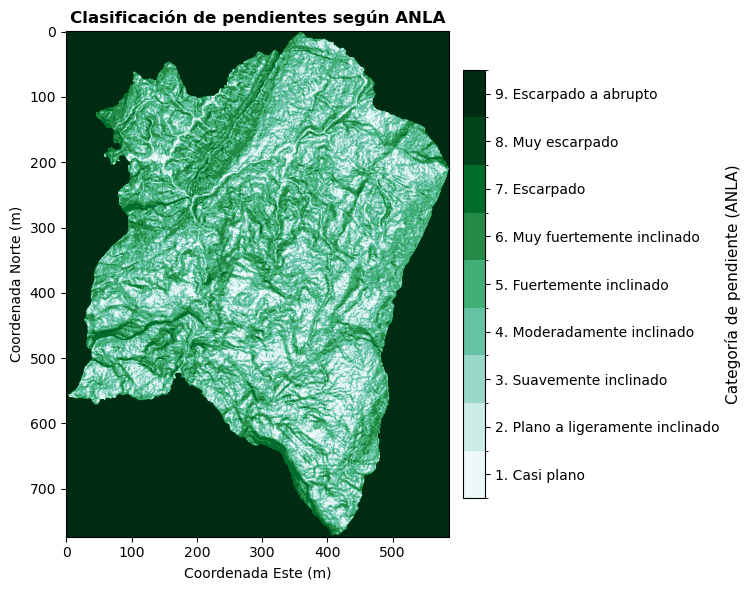

In [7]:
# Reusar tus bins y descripciones simplificadas
bins = [0, 3, 5, 7, 10, 15, 25, 50, 70, 90]
descripciones = [
    "1. Casi plano", "2. Plano a ligeramente inclinado", "3. Suavemente inclinado",
    "4. Moderadamente inclinado", "5. Fuertemente inclinado", "6. Muy fuertemente inclinado",
    "7. Escarpado", "8. Muy escarpado", "9. Escarpado a abrupto"
]

# Clasificar
clasificada_array = np.digitize(pendiente_data, bins=bins, right=False) - 1
clasificada_array = clasificada_array.astype("float32")
clasificada_array[pendiente_data <= 0] = np.nan

# Enmascarar NaNs para visualización
masked_array = np.ma.masked_invalid(clasificada_array)

# Colores y normalización
cmap = ListedColormap([
    "#edf8fb", "#ccece6", "#99d8c9", "#66c2a4", "#41ae76",
    "#238b45", "#006d2c", "#00441b", "#002b13"
])
norm = BoundaryNorm(np.arange(-0.5, 9.5, 1), cmap.N)

# Visualización
plt.figure(figsize=(10, 6))
im = plt.imshow(masked_array, cmap=cmap, norm=norm)
cbar = plt.colorbar(im, ticks=np.arange(0, 9), fraction=0.03, pad=0.02)
cbar.ax.set_yticklabels(descripciones)
cbar.set_label("Categoría de pendiente (ANLA)", fontsize=11)
plt.title("Clasificación de pendientes según ANLA", fontweight="bold")
plt.xlabel("Coordenada Este (m)")
plt.ylabel("Coordenada Norte (m)")
plt.tight_layout()
plt.show()

#### 1.1.2. Red hidrográfica (drenajes)

La red hidrográfica representa uno de los componentes más determinantes en la evaluación físico-ambiental de un territorio, al incidir sobre la dinámica hídrica, la erosión, la acumulación de sedimentos y los procesos de inundación.

En este proyecto se utiliza la red hidrográfica oficial proveniente de la **Cartografía Base** del Instituto Geográfico Agustín Codazzi (IGAC), en formato vectorial tipo *línea*. Esta capa contiene información detallada sobre los cauces principales, secundarios y quebradas, permitiendo evaluar la distribución espacial de los drenajes en relación con otros factores ambientales.

Se procesará esta capa para:

- Delimitar zonas de influencia hídrica.
- Calcular distancias a cauces (buffer o raster de distancia).
- Integrar este insumo en el modelo multicriterio como restricción o factor.

>Para analizar únicamente la red hidrográfica dentro del municipio de Puente Nacional, es necesario filtrar el dataset nacional para conservar únicamente la capa de drenajes y recortar dicha capa al límite municipal. Este procedimiento garantiza que el análisis posterior del componente hídrico se realice únicamente sobre el área de interés.

##### 1.1.2.2. Reproyección Cartografía Base

Dado que la cartografía base `Carto100000_Colombia_DI_2022.gpkg` contiene múltiples capas temáticas necesarias para el análisis, se realiza su reproyección completa al sistema de coordenadas EPSG:3116, que corresponde al sistema oficial para Colombia con unidades métricas.

Durante este proceso, también se suprimen advertencias técnicas asociadas a inconsistencias en campos no utilizados (como valores por defecto en columnas de fecha) y a cambios recientes en el tratamiento de geometrías vacías en GeoPandas. Así mismo, se filtran de manera preventiva aquellas geometrías que estén vacías o nulas, de modo que solo se conserven objetos espaciales válidos para el análisis posterior.

Como resultado, se genera un nuevo archivo GeoPackage reproyectado (`Carto100000_epsg3116.gpkg`) con todas las capas limpias y listas para ser recortadas y utilizadas en las etapas siguientes del análisis multicriterio.

In [17]:
#SUPRIMIR ADVERTENCIAS 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message=".*Non-conformant content.*")
warnings.filterwarnings("ignore", message="GeoSeries.notna", category=UserWarning)

# Rutas de entrada y salida
ruta_gpkg_original = "data/Carto100000_Colombia_DI_2022.gpkg"
ruta_salida_gpkg = "output/Carto100000_epsg3116.gpkg"

# Crear carpeta de salida si no existe
os.makedirs("output", exist_ok=True)

# Listar capas disponibles en el GPKG
capas = fiona.listlayers(ruta_gpkg_original)
print("Capas encontradas:")
for capa in capas:
    print(f" - {capa}")

# Reproyección y limpieza de geometrías vacías/nulas
for capa in capas:
    print(f"\nProcesando capa: {capa}")
    gdf = gpd.read_file(ruta_gpkg_original, layer=capa)
    gdf_proj = gdf.to_crs(epsg=3116)
    gdf_proj = gdf_proj[~gdf_proj.geometry.is_empty & gdf_proj.geometry.notna()]
    gdf_proj.to_file(ruta_salida_gpkg, layer=capa, driver="GPKG")

print("\n✅ Cartografía reproyectada y limpia guardada en:")
print(ruta_salida_gpkg)

Capas encontradas:
 - Arbol
 - Planta_Tratamiento
 - Construccion_Agua_P
 - Parque_P
 - Central_Energia
 - Tapa_Camara
 - Mina_P
 - Construccion_P
 - Administrativo_P_Departamental
 - Administrativo_P
 - Otros_Textos
 - Torre
 - Puente_P
 - Antena
 - Poste
 - Paso_Nivel
 - Peaje
 - Terminal_P
 - Punto_Geodesico
 - Hito_Limite
 - Punto_Cota_Fotogrametrica
 - Punto_Aerotriangulacion
 - Punto_Estereoscopico
 - Punto_Topografico
 - Punto_Nivelacion
 - Jaguey_P_Departametal
 - Manantial
 - Jaguey_P
 - Cienaga_P
 - Nomenclatura
 - Orografia
 - Costero_Insular
 - Helipuerto_P
 - Aeropuerto_P
 - Puerto_P
 - Embarcadero_Muelle
 - Lote_L
 - Muro
 - Construccion_Agua_L
 - Terraplen
 - Cerca
 - Tuberia
 - Red_Alta_Tension
 - Puente_L
 - Tunel
 - Curva_Nivel
 - Canal_Sencillo
 - Raudal_Rapido
 - Drenaje_Sencillo
 - Catarata
 - Madrevieja_L
 - Linea_Costera
 - Pista_Aterrizaje_L
 - Via
 - Via_Ferrea
 - Limite_Via
 - Teleferico
 - Cicloruta
 - Matorral
 - Zona_Verde
 - Grupo_arboles
 - Bosque
 - Zona

##### 1.1.2.3 Recorte de drenajes con área de influencia

Para preparar adecuadamente la rasterización y evitar efectos de borde, es recomendable no recortar las capas vectoriales exactamente al límite municipal, sino considerar una zona de influencia adicional que garantice continuidad espacial en los análisis posteriores (por ejemplo, distancia a drenajes o interpolaciones).

Por ello, en esta etapa se realiza un recorte de los drenajes al límite municipal ampliado mediante un buffer de 1 km, lo cual permite capturar drenajes adyacentes que podrían influir en los procesos espaciales dentro del municipio. Este enfoque también permite construir superficies raster más completas, sin pérdida de información en los bordes.

In [20]:
# Rutas de entrada
ruta_gpkg = "output/Carto100000_epsg3116.gpkg"
ruta_limite = "data/puente_nacional_epsg3116.shp"

# Crear carpeta de salida
os.makedirs("output/drenajes_recortados", exist_ok=True)

# Cargar límite municipal
limite = gpd.read_file(ruta_limite)

# Crear buffer de 1 km (1000 m)
buffer_mpio = limite.to_crs(epsg=3116).buffer(1000)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_mpio, crs=3116)

# Recorte de drenaje sencillo
drenaje_sencillo = gpd.read_file(ruta_gpkg, layer="Drenaje_Sencillo")
drenaje_sencillo_clip = gpd.overlay(drenaje_sencillo, buffer_gdf, how='intersection')
drenaje_sencillo_clip.to_file("output/drenajes_recortados/drenaje_sencillo_buffer1km.gpkg", driver="GPKG")

# Recorte de drenaje doble
drenaje_doble = gpd.read_file(ruta_gpkg, layer="Drenaje_Doble")
drenaje_doble_clip = gpd.overlay(drenaje_doble, buffer_gdf, how='intersection')
drenaje_doble_clip.to_file("output/drenajes_recortados/drenaje_doble_buffer1km.gpkg", driver="GPKG")

##### 1.1.2.4. Análisis de longitud y densidad de drenajes

Con el fin de caracterizar la red hidrográfica del municipio de Puente Nacional, se calcula la longitud total (en kilómetros) de los drenajes presentes dentro del límite municipal, así como su densidad lineal, entendida como la cantidad de kilómetros de drenaje por kilómetro cuadrado de superficie.

Estos indicadores permiten evaluar la presencia relativa de drenajes en el territorio, insumo clave para criterios como conectividad hídrica, susceptibilidad a inundaciones, o disponibilidad de escorrentía superficial. El análisis se realiza por separado para drenajes simples y dobles.

In [21]:
# Rutas de entrada
ruta_limite = "data/puente_nacional_epsg3116.shp"
ruta_drenaje_sencillo = "output/drenajes_recortados/drenaje_sencillo_buffer1km.gpkg"
ruta_drenaje_doble = "output/drenajes_recortados/drenaje_doble_buffer1km.gpkg"

# Cargar límite municipal
limite = gpd.read_file(ruta_limite)

# Cargar drenajes recortados y reproyectarlos (por si acaso)
drenaje_sencillo = gpd.read_file(ruta_drenaje_sencillo).to_crs(epsg=3116)
drenaje_doble = gpd.read_file(ruta_drenaje_doble).to_crs(epsg=3116)

# Recortar drenajes al límite exacto del municipio
drenaje_sencillo_mpio = gpd.overlay(drenaje_sencillo, limite, how='intersection')
drenaje_doble_mpio = gpd.overlay(drenaje_doble, limite, how='intersection')

# Calcular longitud en metros y pasar a km
drenaje_sencillo_mpio["long_km"] = drenaje_sencillo_mpio.geometry.length / 1000
drenaje_doble_mpio["long_km"] = drenaje_doble_mpio.geometry.length / 1000

# Longitud total por tipo
long_sencillo = drenaje_sencillo_mpio["long_km"].sum()
long_doble = drenaje_doble_mpio["long_km"].sum()

# Área del municipio en km²
area_km2 = limite.to_crs(epsg=3116).geometry.area.sum() / 1e6

# Densidad lineal
densidad_sencillo = long_sencillo / area_km2
densidad_doble = long_doble / area_km2

# Resultados
print("Drenajes Sencillos:")
print(f" - Longitud total: {long_sencillo:.2f} km")
print(f" - Densidad: {densidad_sencillo:.2f} km/km²\n")

print("Drenajes Dobles:")
print(f" - Longitud total: {long_doble:.2f} km")
print(f" - Densidad: {densidad_doble:.2f} km/km²")

Drenajes Sencillos:
 - Longitud total: 373.73 km
 - Densidad: 1.48 km/km²

Drenajes Dobles:
 - Longitud total: 61.44 km
 - Densidad: 0.24 km/km²


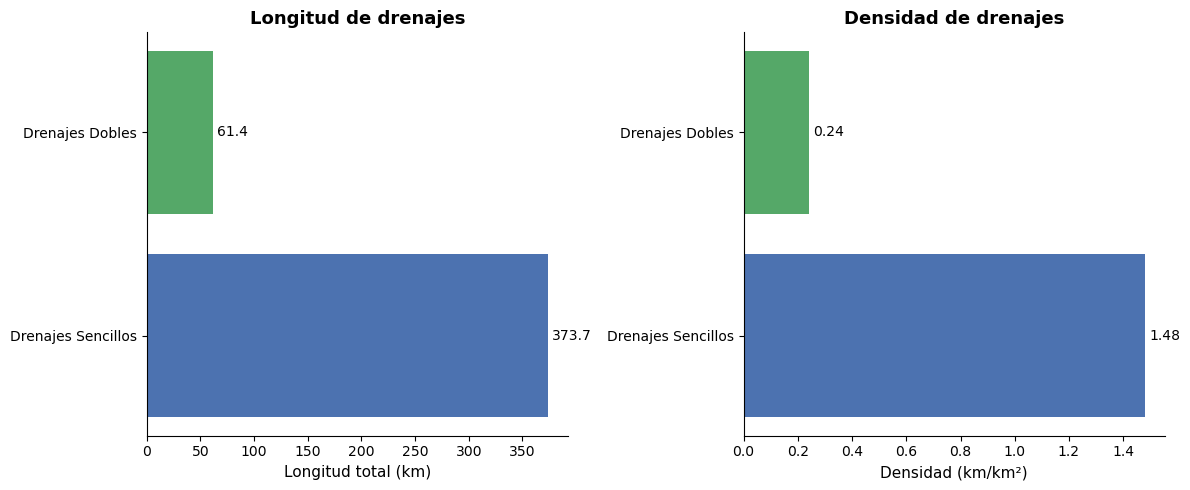

In [23]:
# Datos
tipos = ["Drenajes Sencillos", "Drenajes Dobles"]
longitudes = [373.73, 61.44]
densidades = [1.48, 0.24]

# Estilo general
plt.style.use("seaborn-v0_8-muted")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Colores personalizados
colores = ["#4c72b0", "#55a868"]

# Longitud total 
axs[0].barh(tipos, longitudes, color=colores)
axs[0].set_xlabel("Longitud total (km)", fontsize=11)
axs[0].set_title("Longitud de drenajes", fontsize=13, weight='bold')
axs[0].bar_label(axs[0].containers[0], fmt="%.1f", label_type="edge", fontsize=10, padding=3)

# Densidad lineal
axs[1].barh(tipos, densidades, color=colores)
axs[1].set_xlabel("Densidad (km/km²)", fontsize=11)
axs[1].set_title("Densidad de drenajes", fontsize=13, weight='bold')
axs[1].bar_label(axs[1].containers[0], fmt="%.2f", label_type="edge", fontsize=10, padding=3)

# Ajustes finales
for ax in axs:
    ax.tick_params(labelsize=10)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Los gráficos comparativos muestran la longitud total (en kilómetros) y la densidad lineal (en km/km²) de los drenajes sencillos y dobles dentro del municipio de Puente Nacional. Se observa una marcada predominancia de los drenajes sencillos, con una longitud total de 373,7 km, frente a 61,4 km de drenajes dobles. Esto se refleja también en su densidad territorial: 1,48 km/km² para los sencillos frente a 0,24 km/km² para los dobles.

Estas diferencias indican que la red hídrica del municipio se compone mayoritariamente de cauces simples o menores, que probablemente corresponden a quebradas, canales naturales o escorrentías de menor jerarquía, mientras que los drenajes dobles tienen una menor presencia relativa.

### 1.2. Coberturas terrestre y contexto ecológico

El análisis de cobertura terrestre y contextos ecológicos permite caracterizar el territorio según los usos del suelo y las formaciones bióticas presentes, aspectos clave para orientar procesos de evaluación multicriterio en torno a la sostenibilidad ambiental y la compatibilidad ecológica del trazado de líneas de tensión.

Esta sección integra dos capas fundamentales:  
- La cobertura de la tierra a escala 1:100.000 del IDEAM, que distingue entre usos como agricultura, bosques, áreas urbanas y cuerpos de agua.  
- El shapefile oficial de biomas, que delimita grandes unidades ecológicas según criterios de vegetación, clima y fisionomía.

Ambas capas son procesadas bajo un criterio espacial uniforme, que restringe su extensión al municipio de Puente Nacional, mediante una máscara geográfica basada en su límite oficial. Esta operación asegura la compatibilidad entre capas, optimiza el rendimiento computacional y mejora la precisión de los análisis subsecuentes.

#### 1.2.1. Coberturas

La capa de cobertura de la tierra utilizada en este análisis corresponde a la base de datos 1:100.000 del IDEAM para el año 2020, la cual clasifica el territorio según diferentes tipos de uso y cobertura: vegetación natural, agropecuaria, cuerpos de agua, zonas urbanas, entre otros. Esta información permite identificar zonas de especial interés para la conservación, así como áreas ya intervenidas donde la implementación de infraestructura puede tener menor impacto ecológico.

Como en los insumos anteriores, se aplica una máscara geográfica sobre el municipio de Puente Nacional, extendida mediante un buffer de 1 km, con el fin de incluir zonas aledañas que podrían estar relacionadas funcionalmente con el área de análisis.

In [34]:
# Rutas
ruta_cobertura = "data/e_cobertura_tierra_2020_admin.shp"
ruta_limite = "data/puente_nacional_epsg3116.shp"
salida = "output/cobertura_puente_buffer1km.gpkg"

# Cargar límite municipal
limite = gpd.read_file(ruta_limite)

# Crear buffer de 1 km
buffer = limite.to_crs(epsg=3116).buffer(1000)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer, crs=3116)

# Cargar capa de cobertura
cobertura = gpd.read_file(ruta_cobertura)

# Reproyectar si es necesario
if cobertura.crs != "EPSG:3116":
    cobertura = cobertura.to_crs(epsg=3116)

# Recortar al buffer
cobertura_clip = gpd.overlay(cobertura, buffer_gdf, how='intersection')

# Exportar en formato GeoPackage
cobertura_clip.to_file(salida, driver="GPKG")

print("✅ Capa de cobertura recortada y guardada en:", salida)

✅ Capa de cobertura recortada y guardada en: output/cobertura_puente_buffer1km.gpkg


A partir de la capa recortada de cobertura terrestre se realiza un análisis exploratorio que permite identificar los tipos de uso predominantes dentro del área de estudio. Se calcula la superficie ocupada por cada categoría de cobertura (en hectáreas), así como su proporción relativa sobre el total del área analizada.

In [38]:
# Seleccionar las 10 coberturas con mayor área
top10 = resumen.head(10).copy()

# Redondear y formatear los valores
top10["Área (ha)"] = top10["area_ha"].round(2)
top10["Proporción (%)"] = top10["proporcion_%"].round(2)

# Seleccionar y renombrar columnas
tabla_resumen = top10[["leyenda", "Área (ha)", "Proporción (%)"]]
tabla_resumen.columns = ["Cobertura", "Área (ha)", "Proporción (%)"]

# Mostrar como tabla
import pandas as pd
from IPython.display import display
display(tabla_resumen)

Cobertura  Área (ha)  \
5                               2.3.1. Pastos limpios   10266.91   
10  2.4.3. Mosaico de cultivos, pastos y espacios ...    7608.11   
11    2.4.4. Mosaico de pastos con espacios naturales    5371.84   
9                 2.4.2. Mosaico de pastos y cultivos    4650.46   
20                3.2.3.1. Vegetación secundaria alta    1097.46   
12  2.4.5. Mosaico de cultivos con espacios naturales     844.12   
7                           2.3.3. Pastos enmalezados     429.18   
15  3.1.3.2. Bosque fragmentado con vegetación sec...     421.54   
6                             2.3.2. Pastos arbolados     418.73   
8                          2.4.1. Mosaico de cultivos     385.86   

    Proporción (%)  
5            30.96  
10           22.94  
11           16.20  
9            14.02  
20            3.31  
12            2.55  
7             1.29  
15            1.27  
6             1.26  
8             1.16

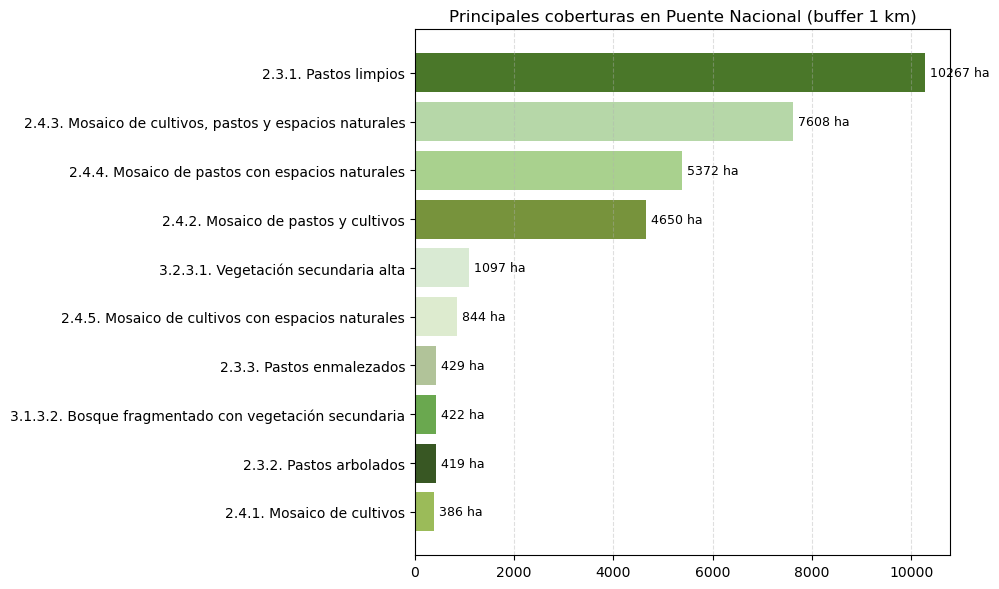

In [62]:
# Data de coberturas con códigos y áreas
data = {
    "codigo": [231, 243, 244, 242, 3231, 245, 233, 3132, 232, 241],
    "leyenda": [
        "2.3.1. Pastos limpios",
        "2.4.3. Mosaico de cultivos, pastos y espacios naturales",
        "2.4.4. Mosaico de pastos con espacios naturales",
        "2.4.2. Mosaico de pastos y cultivos",
        "3.2.3.1. Vegetación secundaria alta",
        "2.4.5. Mosaico de cultivos con espacios naturales",
        "2.3.3. Pastos enmalezados",
        "3.1.3.2. Bosque fragmentado con vegetación secundaria",
        "2.3.2. Pastos arbolados",
        "2.4.1. Mosaico de cultivos"
    ],
    "area_ha": [10267, 7608, 5372, 4650, 1097, 844, 429, 422, 419, 386]
}

resumen = pd.DataFrame(data)

# Diccionario de colores basado en catálogo oficial
colores_rgb = {
    231: "#4a7729", 243: "#b6d7a8", 244: "#a9d18e", 242: "#77933c", 3231: "#d9ead3",
    245: "#ddebcf", 233: "#b1c399", 3132: "#6aa84f", 232: "#385723", 241: "#9bbb59"
}

# Agregar columna de color
resumen["color"] = resumen["codigo"].map(colores_rgb)
resumen["color"] = resumen["color"].fillna("#d3d3d3")

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(resumen["leyenda"], resumen["area_ha"], color=resumen["color"])
plt.title("Principales coberturas en Puente Nacional (buffer 1 km)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Agregar etiquetas con valores exactos
for i, (valor, etiqueta) in enumerate(zip(resumen["area_ha"], resumen["leyenda"])):
    plt.text(valor + 100, i, f"{valor:.0f} ha", va='center', fontsize=9)

plt.tight_layout()
plt.show()

##### 1.2.1.1. Mapa de coberturas de la tierra 

La siguiente figura muestra la distribución de las coberturas terrestres dentro del límite oficial del municipio de Puente Nacional, según la clasificación oficial del IDEAM para el año 2020. Este recorte permite una lectura más precisa y administrativamente relevante del uso del suelo, diferenciando entre coberturas agropecuarias, naturales y antrópicas.

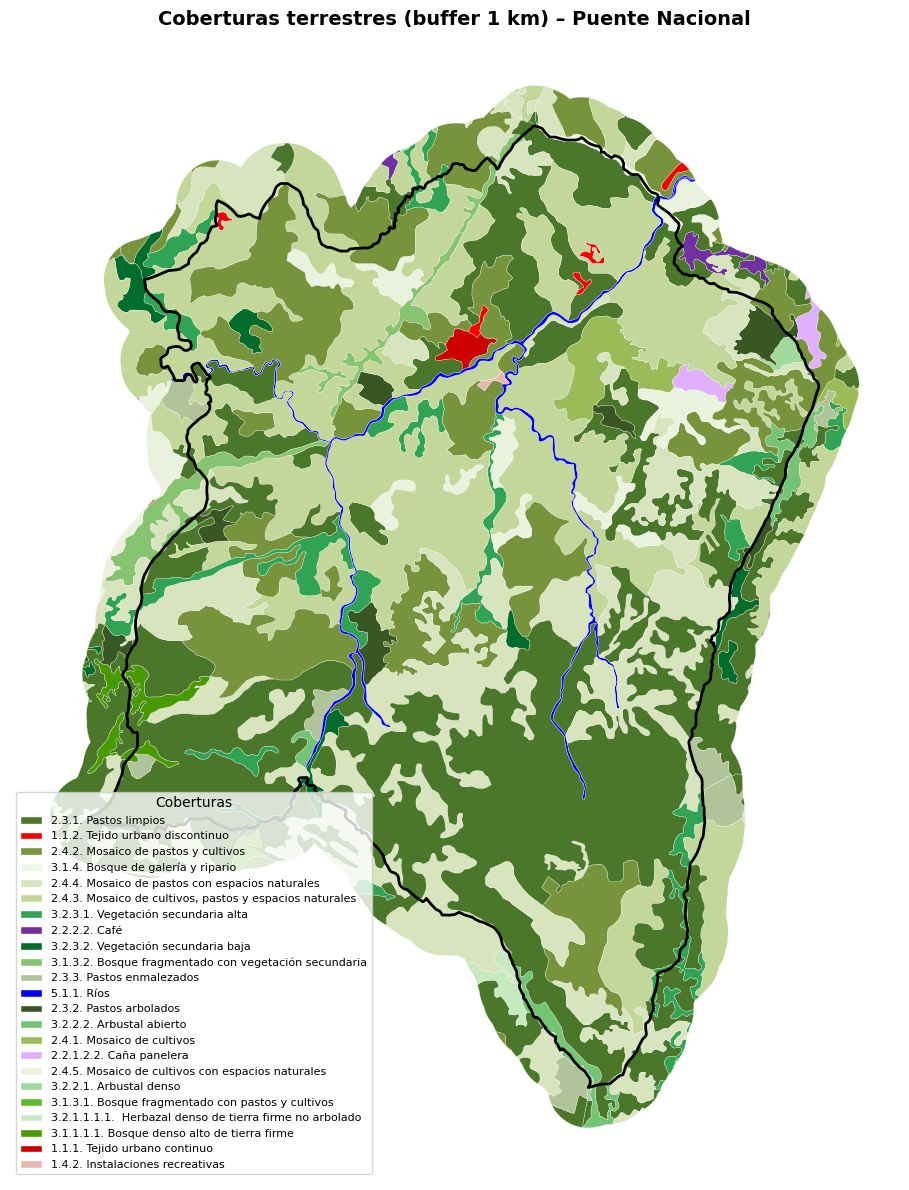

In [63]:
# Cargar capas 
cobertura = gpd.read_file("output/cobertura_puente_buffer1km.gpkg")
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Diccionario de colores según el catálogo CLC Colombia 
colores_rgb = {
    111: "#cc0000", 112: "#f80000", 142: "#e6b8af", 2122: "#c65911", 2222: "#7030a0",
    231: "#4a7729", 232: "#385723", 233: "#b1c399", 241: "#9bbb59", 242: "#77933c",
    243: "#c4d79b", 244: "#d7e4bd", 245: "#eaf1dd",
    31111: "#479b00", 3131: "#61b833", 3132: "#87c46f",
    321111: "#c7e9c0", 3221: "#a1d99b", 3222: "#74c476",
    3231: "#31a354", 3232: "#006d2c",
    411: "#a6cee3", 421: "#1f78b4", 511: "#0000f8", 512: "#0080ff", 513: "#00b2ff",
    521: "#ddebf7", 522: "#bdd7ee", 523: "#9dc3e6",
    314: "#edf8e9", 22122: "#e0b0ff"
}

# Preparar campo de color 
cobertura["codigo"] = cobertura["codigo"].astype(int)
cobertura["color"] = cobertura["codigo"].map(colores_rgb)
cobertura["color"] = cobertura["color"].fillna("#d3d3d3") # Gris para códigos sin color definido

# Crear el mapa 
fig, ax = plt.subplots(figsize=(10, 12))
limite.boundary.plot(ax=ax, color="black", linewidth=2)
cobertura.plot(ax=ax, color=cobertura["color"], edgecolor="white", linewidth=0.2)

# Ajustes de visualización
ax.set_title("Coberturas terrestres (buffer 1 km) – Puente Nacional", fontsize=14, fontweight="bold")
ax.axis("off")

# Crear elementos de leyenda
leyendas = cobertura.drop_duplicates(subset=["codigo", "color", "leyenda"])
leyendas = leyendas[leyendas["color"].notna()]

handles = [
    Patch(facecolor=row["color"], edgecolor="white", label=row["leyenda"])
    for _, row in leyendas.iterrows()
]

# Añadir al mapa
ax.legend(handles=handles, loc="lower left", fontsize=8, title="Coberturas")

plt.tight_layout()
plt.show()

#### 1.2.2. Biomas

El análisis de biomas permite identificar grandes unidades ecológicas que comparten condiciones climáticas, tipos de vegetación y formas de vida predominantes. 

En esta sección se analiza la capa oficial de biomas del Instituto de Hidrología, Meteorología y Estudios Ambientales (IDEAM), recortada al área de influencia definida por un buffer de 1 km alrededor del municipio de Puente Nacional. Se realiza una caracterización general de la distribución de biomas presentes en esta área.

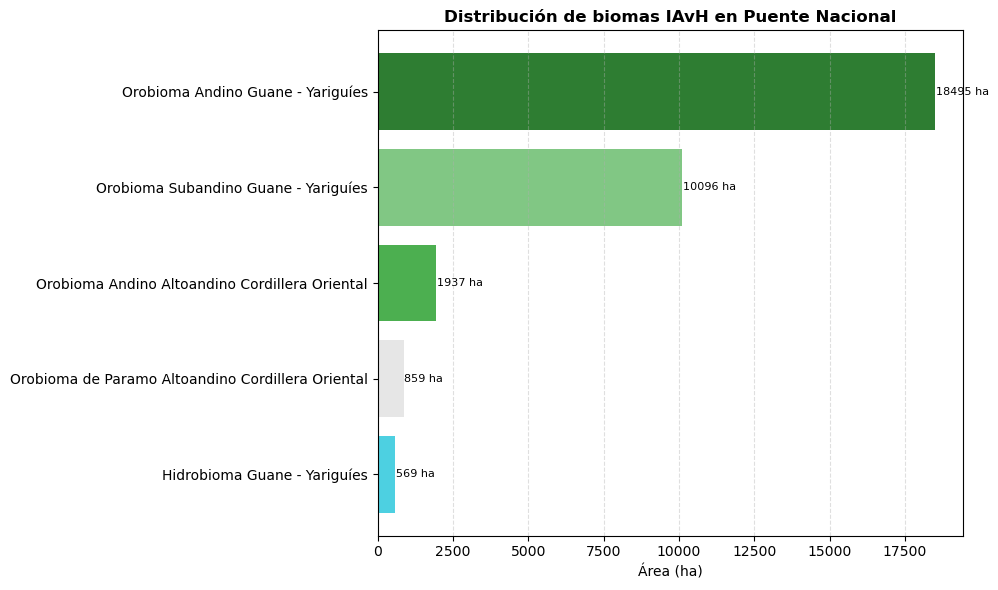

In [89]:
# Cargar y reproyectar la capa
biomas = gpd.read_file("data/Biomas.shp")
biomas = biomas.to_crs(epsg=3116)

# Calcular área en hectáreas si no existe
if "area_ha" not in biomas.columns:
    biomas["area_ha"] = biomas.geometry.area / 10_000

# Guardar la capa reproyectada 
biomas.to_file("output/biomas_puente_3116.gpkg", driver="GPKG")

# Agrupar por bioma IAvH
resumen = biomas.groupby("bioma_IAvH")["area_ha"].sum().reset_index()
resumen = resumen.sort_values("area_ha", ascending=True)

# Asignar colores consistentes con el mapa 
colores_biomas = {
    "Orobioma Andino Guane - Yariguíes": "#2e7d32",
    "Orobioma Subandino Guane - Yariguíes": "#81c784",
    "Orobioma Andino Altoandino Cordillera Oriental": "#4caf50",
    "Orobioma de Paramo Altoandino Cordillera Oriental": "#e6e6e6",  
    "Hidrobioma Guane - Yariguíes": "#4dd0e1"
}

resumen["color"] = resumen["bioma_IAvH"].map(colores_biomas)
resumen["color"] = resumen["color"].fillna("#d3d3d3")  # gris por defecto

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(resumen["bioma_IAvH"], resumen["area_ha"], color=resumen["color"])

plt.xlabel("Área (ha)")
plt.title("Distribución de biomas IAvH en Puente Nacional", fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Etiquetas con valor exacto
for i, (valor, etiqueta) in enumerate(zip(resumen["area_ha"], resumen["bioma_IAvH"])):
    plt.text(valor + 30, i, f"{valor:.0f} ha", va="center", fontsize=8)

plt.tight_layout()
plt.show()

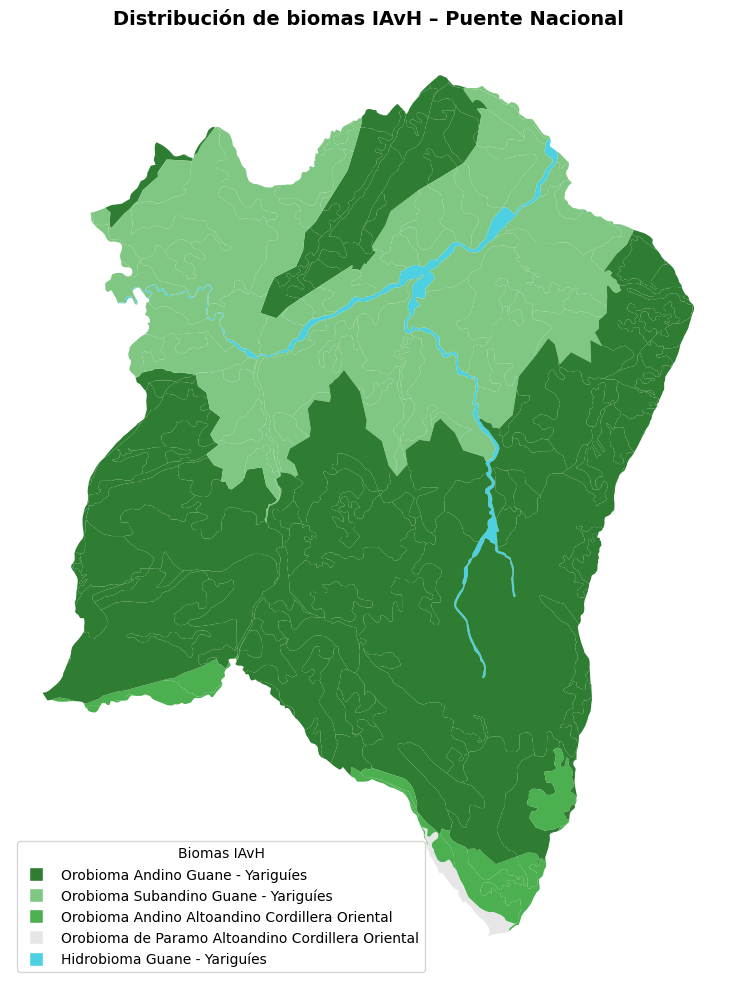

In [93]:
#Cargar la capa 
biomas = gpd.read_file("output/biomas_puente_3116.gpkg")

# Definir colores por bioma IAvH
colores_biomas = {
   "Orobioma Andino Guane - Yariguíes": "#2e7d32",
    "Orobioma Subandino Guane - Yariguíes": "#81c784",
    "Orobioma Andino Altoandino Cordillera Oriental": "#4caf50",
    "Orobioma de Paramo Altoandino Cordillera Oriental": "#e6e6e6",  
    "Hidrobioma Guane - Yariguíes": "#4dd0e1"
}

# Asignar colores a la capa
biomas["color"] = biomas["bioma_IAvH"].map(colores_biomas)
biomas["color"] = biomas["color"].fillna("#d3d3d3")  # Color gris para categorías no definidas

# Crear mapa 
fig, ax = plt.subplots(figsize=(8, 10))
biomas.plot(ax=ax, color=biomas["color"], edgecolor="none")

# Agregar título y leyenda 
ax.set_title("Distribución de biomas IAvH – Puente Nacional", fontsize=14, fontweight="bold")
ax.axis("off")

# Crear leyenda personalizada
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label=nombre, markersize=10, markerfacecolor=color)
    for nombre, color in colores_biomas.items()
]
ax.legend(handles=legend_elements, title="Biomas IAvH", loc="lower left", frameon=True)

plt.tight_layout()
plt.show()

#### 1.2.3. Relación espacial entre biomas IAvH y coberturas del suelo

Con el fin de comprender la forma en que los distintos biomas interactúan con los patrones actuales de cobertura del suelo, se realizó un análisis espacial de intersección entre la capa de biomas IAvH y la capa de coberturas del suelo dentro del municipio de Puente Nacional (incluyendo un buffer de 1 km). Esta intersección permitió identificar la proporción del área de cada bioma que se superpone con los diferentes tipos de cobertura, facilitando así una lectura ecológica-territorial del uso del suelo en el área de estudio.

Para sintetizar y visualizar los resultados de manera clara, se construyó un diagrama de Sankey, que permite observar los flujos de área (en hectáreas) entre cada bioma y las diez coberturas del suelo más representativas. Los flujos están codificados por color según el bioma de origen, mientras que los nodos del diagrama (biomas y coberturas) fueron coloreados de manera diferenciada para facilitar su lectura. Este tipo de representación resulta útil para identificar patrones dominantes de conversión del paisaje, fragmentación o conservación relativa en cada unidad ecológica.

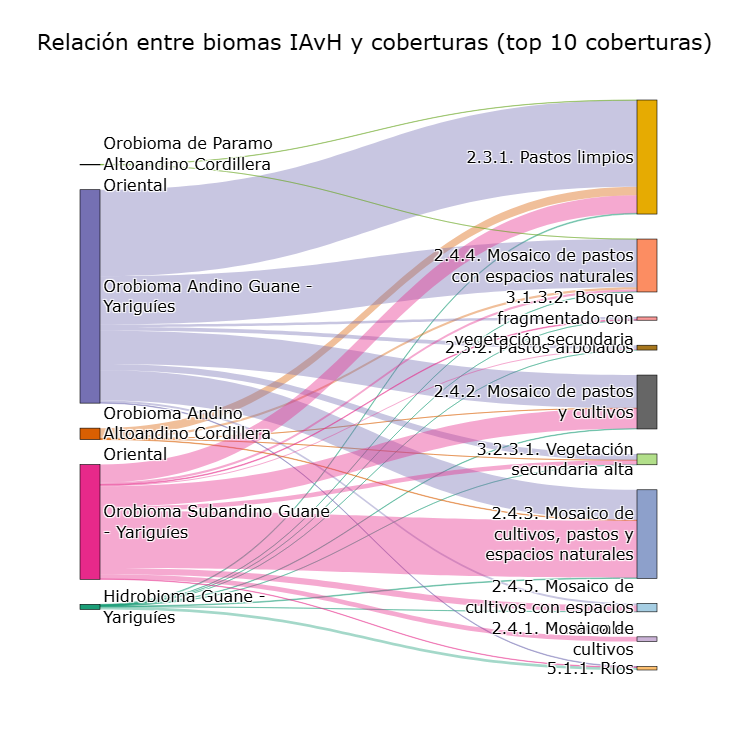

In [120]:
# Cargar datos
biomas = gpd.read_file("output/biomas_puente_3116.gpkg")
coberturas = gpd.read_file("output/cobertura_puente_buffer1km.gpkg")

# Intersección espacial
inter = gpd.overlay(coberturas, biomas, how="intersection")
inter["area_ha"] = inter.geometry.area / 10_000

# Agrupación por bioma y cobertura
tabla = inter.groupby(["bioma_IAvH", "leyenda"])["area_ha"].sum().reset_index()

# Filtrar top 10 coberturas más comunes
top_coberturas = tabla.groupby("leyenda")["area_ha"].sum().nlargest(10).index.tolist()
tabla = tabla[tabla["leyenda"].isin(top_coberturas)]

# Crear nodos únicos 
nodos_biomas = tabla["bioma_IAvH"].unique().tolist()
nodos_coberturas = tabla["leyenda"].unique().tolist()
nodos = nodos_biomas + nodos_coberturas

#  Asignar color único a cada nodo 
palette = [
    "#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e",
    "#e6ab02", "#a6761d", "#666666", "#8da0cb", "#fc8d62",
    "#a6cee3", "#fb9a99", "#b2df8a", "#fdbf6f", "#cab2d6"
]
color_map = {nodo: palette[i % len(palette)] for i, nodo in enumerate(nodos)}

# Mapear índices y colores con opacidad para links
tabla["source"] = tabla["bioma_IAvH"].apply(lambda x: nodos.index(x))
tabla["target"] = tabla["leyenda"].apply(lambda x: nodos.index(x))

def hex_to_rgba(hex_color, alpha=0.4):
    r, g, b = to_rgb(hex_color)
    return f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {alpha})"

tabla["color_link"] = tabla["bioma_IAvH"].map(lambda x: hex_to_rgba(color_map[x]))

# Etiquetas con saltos de línea
def wrap_label(label, width=25):
    return "<br>".join(textwrap.wrap(label, width=width))

labels_wrapped = [wrap_label(n) for n in nodos]
node_colors = [color_map[n] for n in nodos]
link_colors = tabla["color_link"]

# Diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color="black", width=0.6),
        label=labels_wrapped,
        color=node_colors
    ),
    link=dict(
        source=tabla["source"],
        target=tabla["target"],
        value=tabla["area_ha"],
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Relación entre biomas IAvH y coberturas (top 10 coberturas)",
    font=dict(size=16, color="black"),
    width=1200,
    height=750
)

fig.show()

👆🏼 **¿Y que sucede aquí?**

La relación entre biomas y coberturas del suelo evidencia patrones diferenciados de transformación territorial en Puente Nacional. A continuación, se presenta una síntesis interpretativa para cada bioma IAvH, basada en los flujos de mayor magnitud en el diagrama de Sankey:

- **Orobioma Andino Guane – Yariguíes**: Es el bioma con mayor superficie transformada. Destacan las coberturas de *Pastos limpios* (6.131 ha), *Mosaico de pastos y cultivos* (2.349 ha), *Mosaico de cultivos, pastos y espacios naturales* (2.145 ha), y *Mosaico de pastos con espacios naturales* (3.414 ha). La intensidad y diversidad de coberturas sugiere una presión antrópica elevada sobre ecosistemas andinos.

- **Orobioma Subandino Guane – Yariguíes**: También altamente transformado, con predominio del *Mosaico de cultivos, pastos y espacios naturales* (4.049 ha), seguido por *Mosaico de pastos y cultivos* (1.428 ha), *Pastos limpios* (1.270 ha), y *Mosaico de cultivos* (332 ha). Este bioma presenta una notable fragmentación del paisaje, con un patrón agropecuario dominante.

- **Hidrobioma Guane – Yariguíes**: Aunque se trata de un bioma acuático, muestra interacción con coberturas agrícolas. Predominan los *Ríos* (183 ha), pero también aparecen *Pastos limpios* (58 ha), *Mosaico de cultivos y pastos* (47 ha) y *Vegetación secundaria alta* (10 ha). La presencia de coberturas antrópicas en este bioma evidencia intervención en zonas ribereñas.

- **Orobioma Andino Altoandino Cordillera Oriental**: Registra usos agropecuarios en áreas de montaña, con *Pastos limpios* (599 ha) como cobertura principal, seguida por *Mosaico de pastos con espacios naturales* (166 ha) y pequeñas áreas de *Mosaico de cultivos, pastos y espacios naturales* (34 ha). Aunque su superficie intervenida es menor, se evidencian signos de fragmentación.

- **Orobioma de Páramo Altoandino Cordillera Oriental**: Es el bioma menos representado en área, pero aun así muestra intervención por *Pastos limpios* (18 ha) y *Mosaico de pastos con espacios naturales* (1,3 ha). Estos usos son especialmente sensibles debido a la fragilidad ecológica del ecosistema de páramo.


### 1.3. Infraestructura existente

La infraestructura existente constituye un componente fundamental en la localización de líneas de tensión, dado que determina las condiciones de conectividad, acceso y aprovechamiento de instalaciones previamente establecidas. Este criterio permite identificar las zonas que ya cuentan con elementos del sistema técnico-territorial que pueden facilitar la implementación de nuevos proyectos, reducir costos operativos o evitar interferencias críticas.

En este apartado se consideran tres elementos clave de infraestructura: la red vial, las líneas de transmisión existentes y la proximidad a centros poblados. Estos subcriterios contribuyen a evaluar la accesibilidad logística, la posibilidad de integración con el sistema eléctrico nacional y la cercanía a centros de consumo o puntos estratégicos de conexión.

A partir de diversas fuentes cartográficas oficiales y de código abierto, se explorarán y procesarán las capas correspondientes, ajustándolas al ámbito geográfico del municipio de Puente Nacional y preparándolas para su posterior estandarización dentro del modelo multicriterio.

#### 1.3.1. Red vial

La red vial representa un factor determinante en la evaluación territorial para proyectos de infraestructura eléctrica, ya que facilita el transporte de materiales, personal técnico y equipos durante la fase de construcción y operación de las líneas de tensión. Las vías también delimitan corredores logísticos preferentes y condicionan el grado de intervención en zonas de difícil acceso.

Para este análisis, se emplea la red vial contenida en la cartografía base nacional, almacenada en el archivo `Carto100000_epsg3116.gpkg`. Esta capa incluye información detallada sobre los tipos de vía (primarias, secundarias, terciarias, caminos y otras categorías), lo cual permitirá una posterior reclasificación por niveles de accesibilidad.

A continuación, se realiza el cargue de datos, el filtrado de las geometrías correspondientes al subconjunto de vías, la exploración por cada tipología y su recorte espacial con base en el límite del municipio.

In [4]:
# Suprimir advertencias de fecha no estándar
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar límite municipal y crear buffer de 1 km
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")
buffer = limite.buffer(1000)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer, crs=3116)

# Cargar red vial desde la geodatabase ya reproyectada
vial = gpd.read_file("output/Carto100000_epsg3116.gpkg", layer="Via")

# Recorte espacial con el buffer
vial_clip = gpd.overlay(vial, buffer_gdf, how="intersection")

# Guardar salida
vial_clip.to_file("output/red_vial_buffer1km.gpkg", driver="GPKG")

# Vista preliminar
vial_clip.head()

TIPO_VIA ESTADO_SUPERFICIE NUMERO_CARRILES ACCESIBILIDAD NOMBRE_GEOGRAFICO  \
0         4              3306            3502          3600              None   
1         7         Sin Valor       Sin Valor     Sin Valor              None   
2         5              3306       Sin Valor          3601              None   
3         6              3350       Sin Valor          3601              None   
4         6              3350       Sin Valor          3601              None   

  PROYECTO SYMBOL FECHA  RULEID     PK_CUE  \
0     None      2   NaT     4.0  2034606.0   
1     None      2   NaT     7.0  2034607.0   
2     None      2   NaT     5.0  2071071.0   
3     None      2   NaT     6.0  2034433.0   
4     None      2   NaT     6.0  2034434.0   

                                 GLOBALID EJE_VIAL  \
0  {28259B08-5760-435A-915A-2EA65A993B43}     None   
1  {928F9DC8-D70B-48CA-8A9C-C8E0F8D43BFA}     None   
2  {29625F7C-63C2-427E-96DA-90FB37627267}     None   
3  {F88997DE-86DA-45E9-A547-8A03843B0F48}     None   
4  {EC27FCC2-DB1C-414B-AB31-D1E9FDDADAD7}     None   

                                            geometry  
0  LINESTRING (1053112.449 1140938.153, 1053099.0...  
1  LINESTRING (1052559.593 1141310.64, 1052513.99...  
2  LINESTRING (1052836.912 1140645.235, 1052813.7...  
3  LINESTRING (1039693.698 1145989.327, 1039621.7...  
4  LINESTRING (1047234.562 1143677.409, 1047140.3...

##### 1.3.1.1. Análisis de longitud por tipología vial

La caracterización de la red vial se complementa con un análisis cuantitativo de su distribución según el tipo de vía, tomando como referencia el área del municipio de Puente Nacional. Esta visualización permite identificar las categorías viales con mayor presencia territorial, lo cual es clave para inferir el grado de accesibilidad vial en el entorno de posibles trazados de líneas de transmisión. La clasificación se basa en el campo `TIPO_VIA` de la cartografía base, y los resultados se expresan en kilómetros de longitud total por tipología.

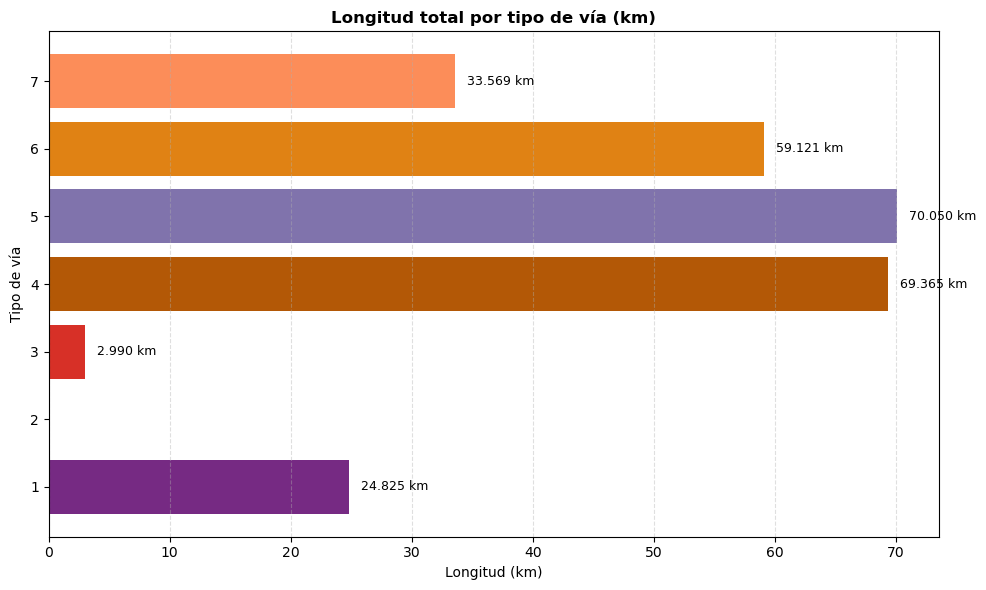

In [90]:
# Suprimir advertencias innecesarias
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar límite municipal
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Cargar red vial 
vial = gpd.read_file("output/Carto100000_epsg3116.gpkg", layer="Via")

# Asegurar CRS y recorte con el límite 
if vial.crs != limite.crs:
    vial = vial.to_crs(limite.crs)
vial_clip = gpd.overlay(vial, limite, how="intersection")

# Calcular longitud
vial_clip["long_km"] = vial_clip.geometry.length / 1000

# Agrupar por tipo de vía
campo_tipo = "TIPO_VIA"
long_por_tipo = (
    vial_clip.groupby(campo_tipo)["long_km"]
    .sum()
    .reset_index()
    .sort_values("long_km", ascending=True)
)

# Asignar colores personalizados
colores_definidos = ['#d73027', '#762a83', '#fc8d59', '#e08214', '#b35806', '#8073ac', '#999999']

# Asegurar que haya suficientes colores definidos
assert len(colores_definidos) >= len(long_por_tipo), "Faltan colores para el número de categorías"

# Crear diccionario de color por tipo
color_dict = {
    tipo: color for tipo, color in zip(long_por_tipo[campo_tipo], colores_definidos)
}

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.barh(
    long_por_tipo[campo_tipo],
    long_por_tipo["long_km"],
    color=[color_dict[tipo] for tipo in long_por_tipo[campo_tipo]]
)

plt.title("Longitud total por tipo de vía (km)", fontweight="bold")
plt.xlabel("Longitud (km)")
plt.ylabel("Tipo de vía")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Etiquetas alineadas 
for bar, valor in zip(bars, long_por_tipo["long_km"]):
    y = bar.get_y() + bar.get_height() / 2
    plt.text(valor + 1, y, f"{valor:.3f} km", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

👆🏼 **¿Cómo está estructurada la red vial en el municipio?** 

Se observa que los tipos de vía 5, 4 y 6 concentran la mayor extensión territorial, con más de 59 kilómetros cada uno, lo cual indica una infraestructura vial relativamente densa en estas categorías. En contraste, los tipos 1, 2 y 3 presentan una menor cobertura espacial, lo que podría reflejar caminos rurales, vías terciarias o corredores de baja conectividad. Esta caracterización resulta clave para priorizar tramos viales estratégicos en función de su accesibilidad y su papel dentro del sistema de transporte local.

##### 1.3.1.2. Definición tipo de vía

A continuación se presentan las definiciones de cada tipo de vía según el *Diccionario de Datos del IGAC* ([ICDE - IGAC, 2020](https://www.icde.gov.co/sites/default/files/datos_fundamentales/COGF_IGAC_Transporte_V.1.pdf)):

| **Tipo de vía** | **Descripción (IGAC)**                                                                                                           |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **1**           | Carretera pavimentada, ancha (más de 5 m), con tránsito vehicular constante, obras de drenaje y transitable durante todo el año. |
| **2**           | Vía sin pavimentar, ancha (más de 5 m), con afirmado, dos o más carriles, transitable durante todo el año.                       |
| **3**           | Vía pavimentada y angosta (5 m o menos), transitable durante todo el año.                                                        |
| **4**           | Vía sin pavimentar, angosta (5 m o menos), afirmada y transitable durante todo el año.                                           |
| **5**           | Carreteable que solo permite el paso de vehículos en época seca; también transitable por personas o animales.                    |
| **6**           | Camino no carreteable ni afirmado, posiblemente transitable en clima seco, principalmente peatonal.                              |
| **7**           | Sendero rural o veredal, angosto, sin pavimento ni afirmado, utilizado por peatones o animales.                                  |

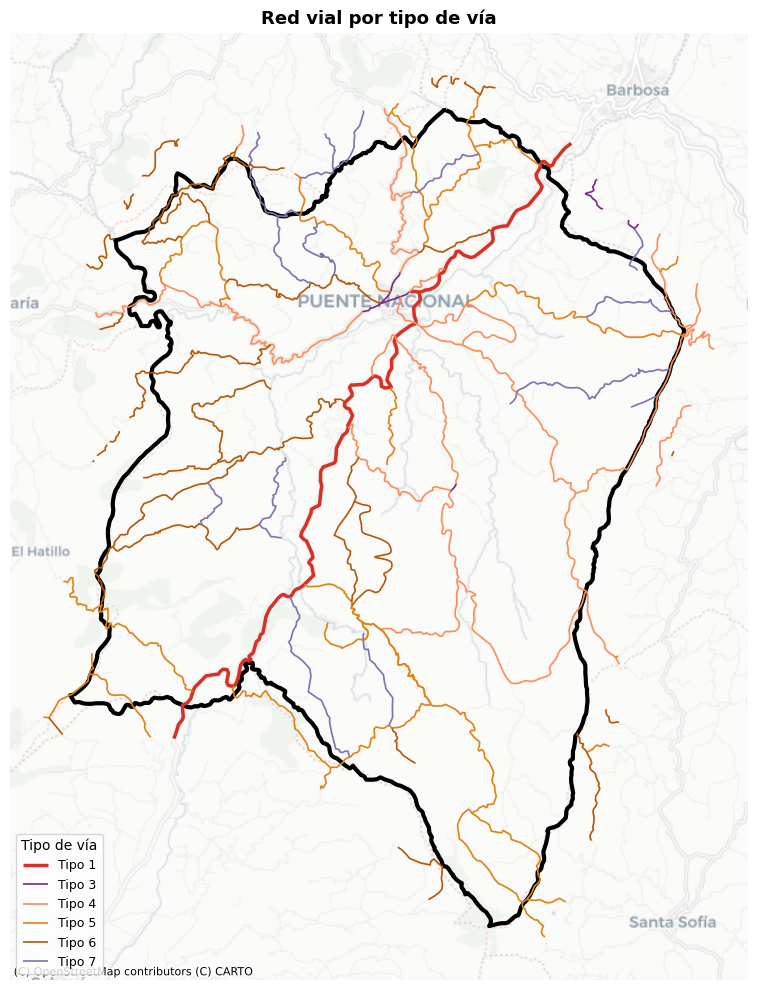

In [36]:
# Suprimir advertencias innecesarias
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar capa vial recortada con buffer
vial_clip = gpd.read_file("output/red_vial_buffer1km.gpkg")

# Cargar límite municipal
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Asegurar CRS compatible
if vial_clip.crs != limite.crs:
    limite = limite.to_crs(vial_clip.crs)

# Convertir a EPSG:3857 para mapa base
vial_clip_web = vial_clip.to_crs(epsg=3857)
limite_web = limite.to_crs(epsg=3857)

# Paleta personalizada de colores
colores_definidos = ['#d73027', '#762a83', '#fc8d59', '#e08214', '#b35806', '#8073ac', '#999999']
tipos_sorted = sorted(vial_clip["TIPO_VIA"].unique())
color_dict = {tipo: color for tipo, color in zip(tipos_sorted, colores_definidos)}

# Gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar límite municipal
limite_web.boundary.plot(ax=ax, color='black', linewidth=3)

# Dibujar cada tipo de vía
for tipo in tipos_sorted:
    sub = vial_clip_web[vial_clip_web["TIPO_VIA"] == tipo]
    grosor = 2.5 if tipo == 1 else 1.2
    sub.plot(ax=ax, color=color_dict[tipo], linewidth=grosor, label=f"Tipo {tipo}")

# Mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Parámetros de visualización
ax.set_title("Red vial por tipo de vía", fontsize=13, fontweight='bold')
ax.set_axis_off()
ax.legend(title="Tipo de vía", loc="lower left", fontsize=9, title_fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

🗺️ *Descripción geográfica del mapa de red vial*

Las vías están clasificadas por tipo, según la codificación oficial del IGAC, y se visualizan con una paleta de colores diferenciada para cada tipología.

- **Tipo 1 (rojo intenso)**: Corresponde a la carretera principal, pavimentada y de mayor jerarquía. Se observa que atraviesa el municipio de sur a norte, cruzando el núcleo urbano de Puente Nacional, y conecta con municipios vecinos, lo que la convierte en el eje logístico principal.

- **Tipo 3 (violeta oscuro)**: Representa vías pavimentadas pero más estrechas. Su distribución es secundaria respecto al tipo 1, ramificándose desde la vía principal hacia sectores urbanos y periurbanos.

- **Tipos 4, 5 y 6 (naranjas, terracotas y ocres)**: Indican vías sin pavimentar, afirmadas o no, y carreteables solo en clima seco. Estas tipologías predominan en las zonas rurales y veredales, cubriendo gran parte del área oeste, norte y sureste del municipio.

- **Tipo 7 (gris oscuro)**: Son senderos rurales o veredales. Se distribuyen en las zonas más alejadas del centro poblado, destacando especialmente en el sur y suroccidente, donde el acceso motorizado es limitado o nulo.

En conjunto, esta red muestra un patrón jerárquico donde una vía principal estructura el territorio, mientras que vías secundarias y rurales brindan conectividad a zonas de menor densidad.

#### 1.3.2. Lineas licenciadas

Estas líneas representan corredores ya aprobados para el desarrollo de infraestructura, lo que puede traducirse en menores restricciones regulatorias, disponibilidad de servidumbres existentes, y posible sinergia con otros proyectos. A su vez, constituyen un criterio relevante para evitar duplicidades, reducir impactos acumulativos y orientar de forma más eficiente la planificación territorial. 

Su existencia puede indicar áreas con mayor capacidad instalada o con condiciones favorables para el desarrollo de proyectos similares, debido a la viabilidad técnica, ambiental y social previamente verificada.

Las líneas de transmisión eléctrica son infraestructuras clave en el desarrollo energético del país. Su localización, trazado y operación están regulados por diversas entidades, entre ellas la Autoridad Nacional de Licencias Ambientales (ANLA) y la Unidad de Planeación Minero Energética (UPME).

##### 1.3.2.1. Líneas ANLA

En esta sección se consideran los trazados lineales correspondientes a proyectos con licencia ambiental otorgada por la ANLA, los cuales pueden pertenecer a sectores como energía, hidrocarburos y transporte. Esta información fue extraída de la base nacional publicada por la ANLA en su portal de Datos Abiertos.

In [69]:
# Suprimir advertencias innecesarias
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar límite municipal
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Cargar líneas licenciadas y reproyectar
lineas_raw = gpd.read_file("data/Lineas_licenciadas.shp")
lineas = lineas_raw.to_crs(epsg=3116)

# Selección espacial usando union_all()
limite_union = limite.geometry.union_all()
lineas_intersectan = lineas[lineas.intersects(limite_union)]

# Guardar resultado
lineas_intersectan.to_file("output/lineas_licenciadas_mpio_3116.gpkg", driver="GPKG")

# Vista preliminar de atributos relevantes
lineas_intersectan[["proyecto", "sector", "operador", "longitud_m"]].head()

proyecto  sector  \
265  CONSTRUCCIÓN Y OPERACIÓN DEL OLEODUCTO CENTRAL...   101.0   
293       POLIDUCTO DEL ORIENTE (SEBASTOPOL TOCANCIPA)   101.0   
324  CONSTRUCCION DE UNA TRONCAL RAMALES – VELEZ, G...   101.0   
325  CONSTRUCCION DE UNA TRONCAL RAMALES – VELEZ, G...   101.0   
357       POLIDUCTO DEL ORIENTE (SEBASTOPOL TOCANCIPA)   101.0   

                                              operador     longitud_m  
265  TRANSPORTADORA DE GAS INTERNACIONAL S.A. E.S.P...  253950.011201  
293                                     ECOPETROL S.A.    7714.026432  
324  TRANSPORTADORA DE GAS INTERNACIONAL S.A. E.S.P...   44572.388897  
325  TRANSPORTADORA DE GAS INTERNACIONAL S.A. E.S.P...     515.545782  
357                                     ECOPETROL S.A.  269516.577249

> **Resultado:** tras la exploración de atributos se evidenció que no hay presencia de líneas de transmisión de energía licenciadas por ANLA en el municipio. Las líneas que intersectan corresponden a otros sectores, como hidrocarburos.

##### 1.3.2.2. Líneas UPME

La (UPME) dispone de un inventario georreferenciado de las líneas de transmisión eléctrica construidas en Colombia, disponible en formatos abiertos como GeoJSON y CSV. Esta información resulta clave para el análisis territorial de infraestructura energética existente.

En esta sección se carga el archivo `Lineas_construidas_UPME.geojson`, se asegura su reproyección al sistema oficial EPSG:3116, y se visualiza su trazado en relación con el municipio de Puente Nacional.

La fuente original de esta información puede consultarse en el [visor oficial de la UPME](https://sig.upme.gov.co/portal/apps/experiencebuilder/experience/?id=76068f01ad1d40cdbf2e7d7cf84de86b).


In [70]:
# Suprimir advertencias innecesarias
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cargar líneas UPME desde GeoJSON
upme_raw = gpd.read_file("data/Lineas_construidas_UPME.geojson")

# Reproyectar a EPSG:3116
upme_3116 = upme_raw.to_crs(epsg=3116)

# Cargar límite municipal
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Filtrar líneas UPME que intersectan el municipio
upme_mpio = upme_3116[upme_3116.intersects(limite.geometry.union_all())]

# Guardar como archivo GeoPackage
upme_mpio.to_file("output/lineas_upme_mpio_3116.gpkg", driver="GPKG")

# Vista preliminar con campos relevantes
upme_mpio[[
    "nombre_circuito", 
    "nombre_trazado", 
    "nombre_subestacion_inicio", 
    "nombre_subestacion_fin", 
    "tension", 
    "tipo_circuito", 
    "longitud_tramo_km"
]].head()

nombre_circuito                               nombre_trazado  \
257  313 BARBOSA - CHIQUINQUIRA                       BARBOSA - CHIQUINQUIRA   
453    CHINQUINQUIRA - BARBOSA   BARBOSA (SANTANDER) - CHIQUINQUIRA 1 115 kV   

    nombre_subestacion_inicio nombre_subestacion_fin tension tipo_circuito  \
257                   BARBOSA           CHIQUINQUIRA  115,00         Aéreo   
453              CHIQUINQUIRA                BARBOSA  115,00         Aéreo   

    longitud_tramo_km  
257              0,15  
453             43,02

💡 **Líneas de Transmisión eléctrica**

Tras aplicar una selección espacial por intersección con el límite del municipio de Puente Nacional, se identificaron dos tramos de líneas eléctricas que atraviesan total o parcialmente el territorio. Ambas pertenecen al sistema **CHIQUINQUIRÁ – BARBOSA**, con una tensión nominal de **115 kV** y corresponden a infraestructura de tipo aéreo.

- El primer tramo identificado tiene una longitud de 43.02 km, y conecta la subestación de Chiquinquirá con la de Barbosa (Santander). Este segmento representa el componente principal de la línea.

- El segundo tramo, mucho más corto (0.15 km), corresponde posiblemente a una pequeña intersección o ramal auxiliar entre ambas subestaciones o un error de georreferenciación, pero igualmente fue capturado en la consulta espacial.

Estos resultados evidencian que, si bien el municipio de Puente Nacional no cuenta con un entramado complejo de líneas de transmisión, sí se encuentra dentro de un corredor de media tensión que conecta dos subestaciones regionales estratégicas. Esto representa una ventaja técnica para la localización de nuevos proyectos de infraestructura eléctrica, dado que ya existen corredores licenciados que podrían aprovecharse o reforzarse.

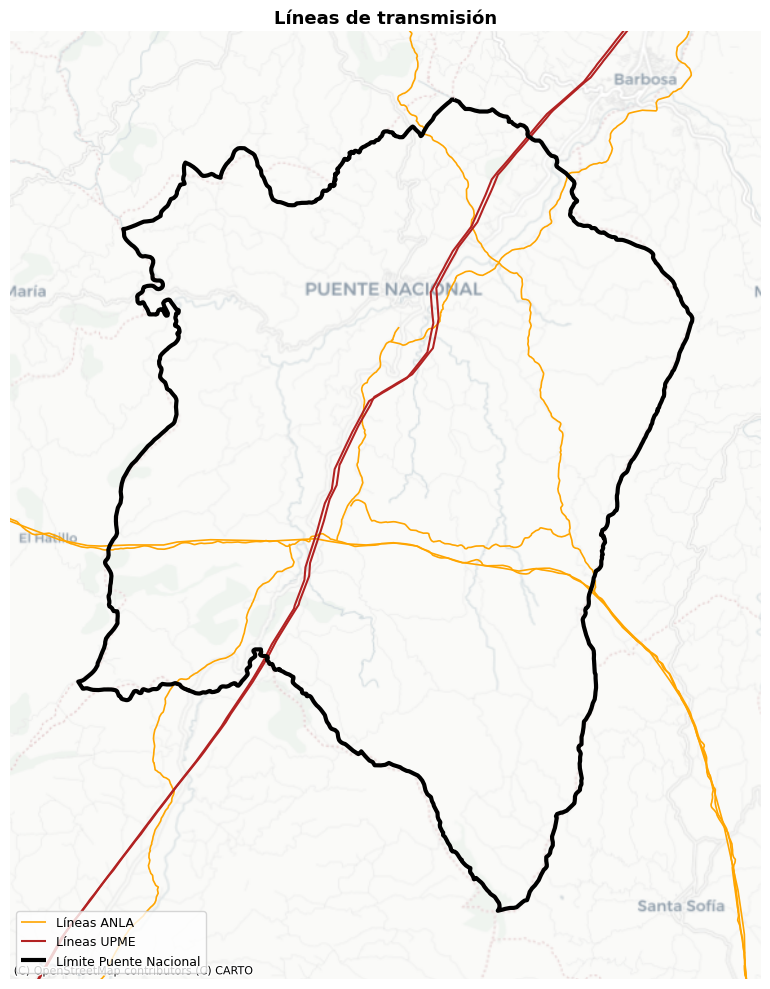

In [73]:
# Cargar límite municipal
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Cargar líneas ANLA
anla = gpd.read_file("output/lineas_licenciadas_mpio_3116.gpkg")

# Cargar líneas UPME 
upme = gpd.read_file("output/lineas_upme_mpio_3116.gpkg")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Trazar líneas ANLA
anla.plot(ax=ax, color="orange", linewidth=1.2, label="Líneas ANLA")

# Trazar líneas UPME
upme.plot(ax=ax, color="firebrick", linewidth=1.5, label="Líneas UPME")

# Trazar límite del municipio
limite.boundary.plot(ax=ax, color="black", linewidth=3, label="Límite Puente Nacional")

# Ajustar a la extensión del municipio con margen
buffer = 2000  # en metros
bounds = limite.total_bounds
ax.set_xlim(bounds[0] - buffer, bounds[2] + buffer)
ax.set_ylim(bounds[1] - buffer, bounds[3] + buffer)

# Añadir mapa base
cx.add_basemap(ax, crs=limite.crs, source=cx.providers.CartoDB.Positron)

# Parámetros de visualización
ax.set_title("Líneas de transmisión", fontsize=13, fontweight='bold')
ax.set_axis_off()
ax.legend(loc="lower left", fontsize=9, title_fontsize=10, frameon=True)

# Mostrar mapa
plt.tight_layout()
plt.show()


Ambas capas fueron filtradas por intersección con el límite municipal y reproyectadas al sistema de coordenadas MAGNA–Colombia Bogotá (EPSG:3116). El mapa permite observar la coexistencia de ambos tipos de infraestructura, destacando la continuidad de corredores energéticos entre municipios vecinos y las posibles redundancias o complementariedades de planificación.

### 1.4. Dimensión social

La dimensión social dentro del análisis multicriterio busca representar los elementos relacionados con la población, sus asentamientos y posibles condiciones de vulnerabilidad ante el desarrollo de proyectos de infraestructura como las líneas de transmisión eléctrica. Inicialmente se contempló incluir la presencia de comunidades étnicas; sin embargo, tras validar la información disponible, se comprobó que en el municipio de Puente Nacional no existen Resguardos Indígenas ni territorios colectivos reconocidos oficialmente.

En este sentido, se optó por incorporar exclusivamente los **centros poblados** como proxy espacial para representar la dimensión social, bajo el supuesto de que estos concentran la mayor presencia humana y, por tanto, deben considerarse prioritarios en cualquier análisis de afectación o interferencia territorial.

La variable centros poblados permite identificar asentamientos humanos que pueden verse directa o indirectamente impactados por proyectos de líneas de transmisión. Su localización resulta clave tanto para estimar posibles impactos sociales como para orientar criterios de exclusión o restricción en la toma de decisiones.

/tmp/ipykernel_65/2151781911.py:44: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Tipo de vía", loc="lower left", fontsize=9, title_fontsize=10, frameon=True)


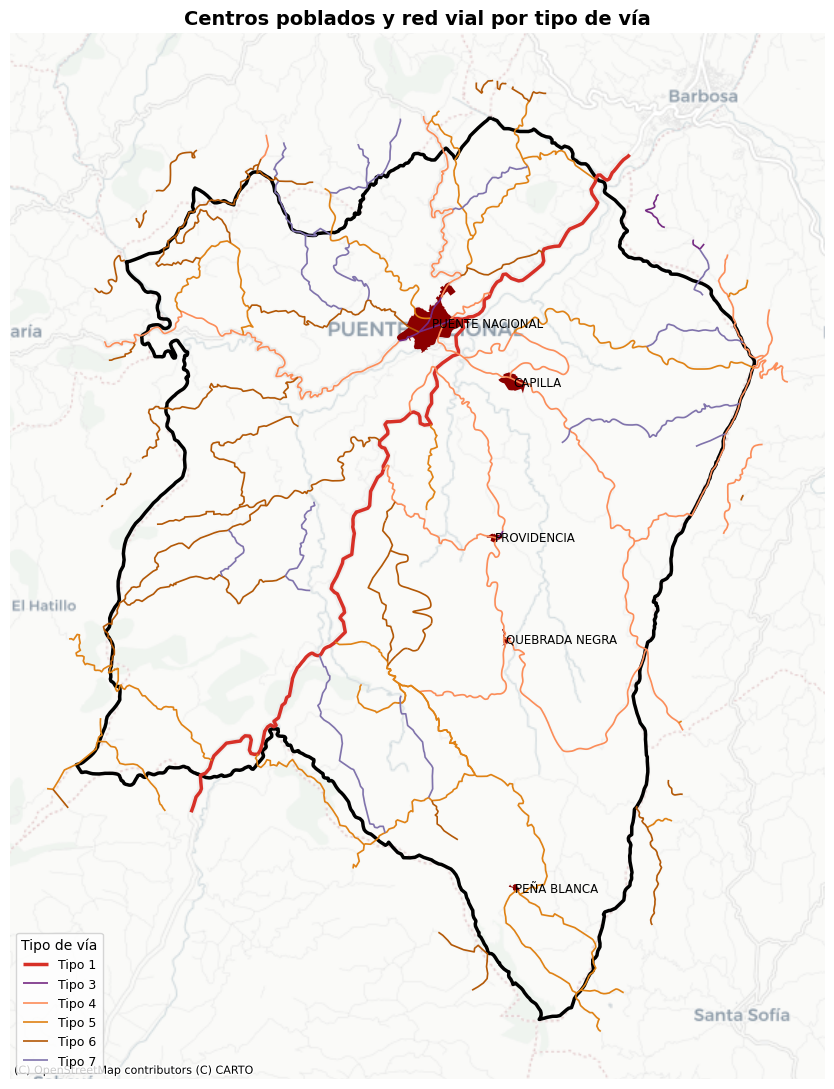

In [103]:
# Cargar datos
vias = gpd.read_file("output/red_vial_buffer1km.gpkg")
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")
cp = gpd.read_file("output/centros_poblados_mpio_3116.gpkg")

# Reproyectar todo a EPSG:3857
vias_web = vias.to_crs(epsg=3857)
limite_web = limite.to_crs(epsg=3857)
cp_web = cp.to_crs(epsg=3857)

# Colores vías
colores_definidos = ['#d73027', '#762a83', '#fc8d59', '#e08214', '#b35806', '#8073ac', '#999999']
tipos_sorted = sorted(vias["TIPO_VIA"].unique())
color_dict = {tipo: color for tipo, color in zip(tipos_sorted, colores_definidos)}

# Calcular centroides para etiquetas de CP
cp_web["centroide"] = cp_web.geometry.centroid

# Mapa combinado
fig, ax = plt.subplots(figsize=(11, 11))

# Límite
limite_web.boundary.plot(ax=ax, color='black', linewidth=2.5)

# Vías por tipo
for tipo in tipos_sorted:
    sub = vias_web[vias_web["TIPO_VIA"] == tipo]
    grosor = 2.5 if tipo == 1 else 1.2
    sub.plot(ax=ax, color=color_dict[tipo], linewidth=grosor, label=f"Tipo {tipo}")

# Centros poblados
cp_web.plot(ax=ax, color="darkred", markersize=40, label="Centro poblado")

# Nombres de centros poblados
for x, y, nombre in zip(cp_web["centroide"].x, cp_web["centroide"].y, cp_web["zu_cnmbre"]):
    ax.text(x, y, nombre, fontsize=8.5, ha="left", va="center", color="black", alpha=1)

# Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Parámetros de visualización
ax.set_title("Centros poblados y red vial por tipo de vía", fontsize=14, fontweight='bold')
ax.set_axis_off()
ax.legend(title="Tipo de vía", loc="lower left", fontsize=9, title_fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

#### 1.4.1. Cálculo de áreas de centros poblados

Como parte del análisis exploratorio de la dimensión social, se calculó el área de cada centro poblado identificado en el municipio de Puente Nacional. Este indicador permite identificar el tamaño relativo de cada entidad y su peso territorial dentro del municipio. A continuación, se presentan los resultados en hectáreas, junto con el porcentaje que representa cada centro poblado frente al área total ocupada por centros poblados y frente al área total del municipio.

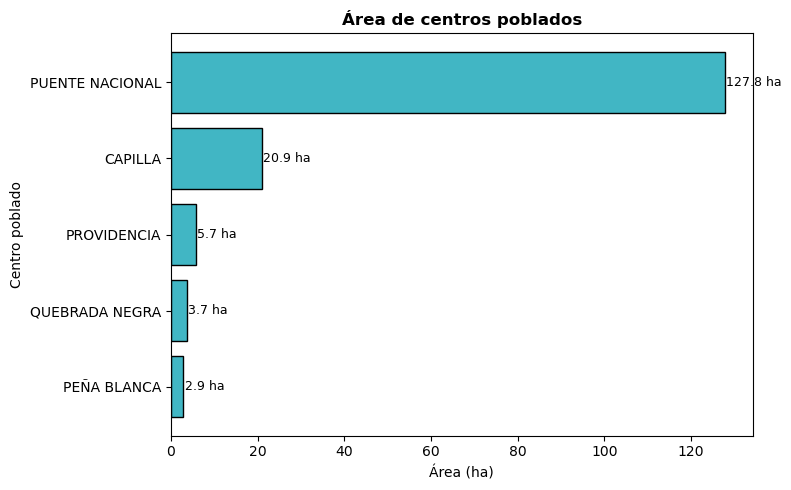


Tabla resumen de áreas por centro poblado:



Nombre CP  Área (ha)  % del total CP  % del área municipal
0      PEÑA BLANCA       2.90            1.80                  0.01
1   QUEBRADA NEGRA       3.71            2.31                  0.01
4      PROVIDENCIA       5.74            3.56                  0.02
3          CAPILLA      20.95           13.01                  0.08
2  PUENTE NACIONAL     127.75           79.33                  0.51

In [113]:
# Cargar datos
cp = gpd.read_file("output/centros_poblados_mpio_3116.gpkg")
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Calcular áreas en hectáreas
cp["area_ha"] = cp.geometry.area / 10_000

# Área total
area_total_cp = cp["area_ha"].sum()
area_mpio = limite.geometry.area.sum() / 10_000

# Porcentajes
cp["% sobre total CP"] = (cp["area_ha"] / area_total_cp) * 100
cp["% sobre municipio"] = (cp["area_ha"] / area_mpio) * 100

# Gráfico de barras con etiquetas
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(tabla["Nombre CP"], tabla["Área (ha)"], color="#41b6c4", edgecolor="black")

# Agregar etiquetas de hectáreas a cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            f"{width:.1f} ha", va='center', fontsize=9, color="black")

# Título y etiquetas
ax.set_title("Área de centros poblados", fontsize=12, fontweight="bold")
ax.set_xlabel("Área (ha)")
ax.set_ylabel("Centro poblado")
plt.tight_layout()
plt.show()

# Tabla resumen
tabla = cp[["zu_cnmbre", "area_ha", "% sobre total CP", "% sobre municipio"]].copy()
tabla.columns = ["Nombre CP", "Área (ha)", "% del total CP", "% del área municipal"]
tabla = tabla.round(2)
tabla = tabla.sort_values(by="Área (ha)", ascending=True)

# Mostrar tabla
print("\nTabla resumen de áreas por centro poblado:\n")
display(tabla)

La gráfica anterior presenta la distribución del área (en hectáreas) de los cinco centros poblados ubicados en el municipio de Puente Nacional. Se observa una marcada concentración espacial en el casco urbano principal, **Puente Nacional**, que abarca aproximadamente **127.8 hectáreas**, lo que representa cerca del **79.33% del total del área de los centros poblados** del municipio y **el 0.51% del área municipal total**.

En contraste, los demás centros poblados Capilla, Providencia, Quebrada Negra y Peña Blanca poseen extensiones significativamente menores, representando entre el **1.8% y el 13%** del área total de centros poblados, y cada uno menos del **0.1%** del territorio municipal.

Este resultado sugiere una **alta concentración del tejido urbano en torno a la cabecera municipal**, lo cual puede tener implicaciones importantes en términos de **distribución de servicios públicos, conectividad vial y acceso a equipamientos sociales**. La baja cobertura territorial de los centros poblados secundarios puede reflejar tanto su menor tamaño poblacional como limitaciones en infraestructura y servicios, aspectos que deberán considerarse en fases posteriores del análisis multicriterio.


### 1.5. Restricciones normativas

El componente de restricciones normativas cumple un rol fundamental en el análisis multicriterio, ya que delimita las áreas incompatibles o excluidas para la localización de proyectos de infraestructura energética. A diferencia de otros criterios que sugieren mayor o menor idoneidad relativa, las restricciones normativas actúan como criterios excluyentes o de veto, cuyo cumplimiento es obligatorio por normativas ambientales o de ordenamiento territorial.

Inicialmente, se consideraron dos posibles fuentes de restricción:

- **Áreas protegidas ambientales (RUNAP):** comprenden parques nacionales, reservas forestales, distritos de manejo y conservación, y demás figuras reconocidas en el Registro Único Nacional de Áreas Protegidas. Estas zonas se consideran no aptas para el desarrollo de líneas de transmisión, por tratarse de ecosistemas estratégicos cuya integridad debe preservarse.

- **Zonas excluidas por normativas municipales (EOT):** se esperaba identificar áreas urbanas consolidadas, zonas de riesgo, suelos de protección o cualquier otra categoría definida por el Esquema de Ordenamiento Territorial del municipio de Puente Nacional como incompatible con usos de infraestructura energética.

> No obstante, tras la exploración detallada de la cartografía oficial del EOT, se identificó que la capa disponible únicamente clasifica el suelo en categorías funcionales como `INTENSVIVIENDA` e `INTENSEMPLEO`, sin delimitar zonas expresamente excluidas o no aptas para infraestructura energética. Por tanto, se decidió **no incorporar dicha capa como restricción normativa** dentro del modelo SMCE. En consecuencia, la única capa considerada en esta dimensión es la de **áreas protegidas RUNAP**, la cual sí cumple con el criterio de exclusión estricta.

#### 1.5.1. Áreas de protección ambiental

Las áreas de protección ambiental, registradas oficialmente en el **Registro Único Nacional de Áreas Protegidas (RUNAP)**, representan zonas de especial interés ecológico y ambiental que gozan de diferentes niveles de protección por parte del Estado. Su presencia en el territorio implica **restricciones absolutas para la construcción de infraestructura energética**, ya que su objetivo principal es la conservación de ecosistemas estratégicos, la biodiversidad y los servicios ecosistémicos.

Dentro del RUNAP se incluyen figuras como:

- Parques Nacionales Naturales
- Reservas Forestales Protectoras
- Distritos de Manejo Integrado
- Santuarios de Fauna y Flora
- Áreas de Recreación
- Reservas de la Sociedad Civil, entre otras

El análisis se enfoca en identificar la presencia, distribución y proporción de estas áreas dentro del municipio de Puente Nacional, así como su posible interferencia con la localización de trazados para líneas de transmisión eléctrica. Para ello, se realizará la intercepción espacial de la capa nacional del RUNAP a partir del límite municipal, seguido del cálculo de áreas y la representación cartográfica correspondiente.

In [121]:
# Cargar las capas
runap = gpd.read_file("data/runap.shp")
limite = gpd.read_file("data/puente_nacional_epsg3116.shp")

# Reproyectar RUNAP al CRS del límite municipal
runap = runap.to_crs(limite.crs)

# Seleccionar áreas RUNAP que intersectan con el municipio (sin deprecaciones)
# Opción segura si límite solo tiene una geometría:
geom_mpio = limite.geometry.iloc[0]
runap_sel = runap[runap.geometry.intersects(geom_mpio)]

# Exportar resultado
runap_sel.to_file("output/runap_mpio_3116.gpkg", driver="GPKG")

# Explorar atributos clave
print("\nNombres únicos de las áreas protegidas:")
print(runap_sel["ap_nombre"].unique())

print("\nCategorías de protección ambiental:")
print(runap_sel["ap_categor"].unique())

print("\nConteo por categoría:")
print(runap_sel["ap_categor"].value_counts())


Nombres únicos de las áreas protegidas:
['Páramos de Telecom y Merchán' 'Parque el Higuerón' 'Ecosaravita']

Categorías de protección ambiental:
['Reservas Forestales Protectoras Regionales'
 'Reservas Forestales Protectoras Nacionales'
 'Reserva Natural de la Sociedad Civil']

Conteo por categoría:
ap_categor
Reservas Forestales Protectoras Regionales    1
Reservas Forestales Protectoras Nacionales    1
Reserva Natural de la Sociedad Civil          1
Name: count, dtype: int64


##### Resultados preliminares: presencia de áreas protegidas en Puente Nacional

Se identificaron **tres áreas protegidas** dentro del municipio, cada una perteneciente a una categoría distinta de protección ambiental:

| Nombre del área protegida            | Categoría de protección                               | Nivel institucional        |
|-------------------------------------|--------------------------------------------------------|----------------------------|
| Páramos de Telecom y Merchán        | Reserva Forestal Protectora Regional                   | Regional (CAR)             |
| Parque el Higuerón                  | Reserva Forestal Protectora Nacional                   | Nacional (MinAmbiente)     |
| Ecosaravita                         | Reserva Natural de la Sociedad Civil                   | Privada / Sociedad civil   |

Estas figuras evidencian la diversidad de esquemas de conservación presentes en Puente Nacional, con participación de entidades estatales y actores privados.

##### 1.5.1.1. Cobertura y proporción de áreas protegidas

Esta subsección presenta el análisis cuantitativo de las áreas protegidas que intersectan con el municipio de Puente Nacional. A partir del cálculo del área geográfica ocupada por cada figura de conservación y su proporción respecto al total del territorio municipal, se identifica el nivel de incidencia normativa en términos de ocupación del suelo.

In [157]:
# Calcular áreas y proporciones
runap_sel["area_ha"] = runap_sel.geometry.area / 10_000
area_mpio = limite.geometry.area.iloc[0] / 10_000
runap_sel["proporcion_%"] = (runap_sel["area_ha"] / area_mpio) * 100

# Crear tabla
tabla = runap_sel[["ap_nombre", "ap_categor", "area_ha", "proporcion_%"]].copy()
tabla.columns = ["Nombre del área", "Categoría", "Área (ha)", "% del área municipal"]
tabla = tabla.round(2)
tabla = tabla.sort_values(by="Área (ha)", ascending=True)

# Mostrar tabla
print("\nTabla resumen de cobertura de áreas protegidas:\n")
display(tabla)


Tabla resumen de cobertura de áreas protegidas:



Nombre del área                                   Categoría  \
2                   Ecosaravita        Reserva Natural de la Sociedad Civil   
1            Parque el Higuerón  Reservas Forestales Protectoras Nacionales   
0  Páramos de Telecom y Merchán  Reservas Forestales Protectoras Regionales   

   Área (ha)  % del área municipal  
2       5.81                  0.02  
1      21.47                  0.09  
0    2142.65                  8.51

<function matplotlib.pyplot.show(close=None, block=None)>

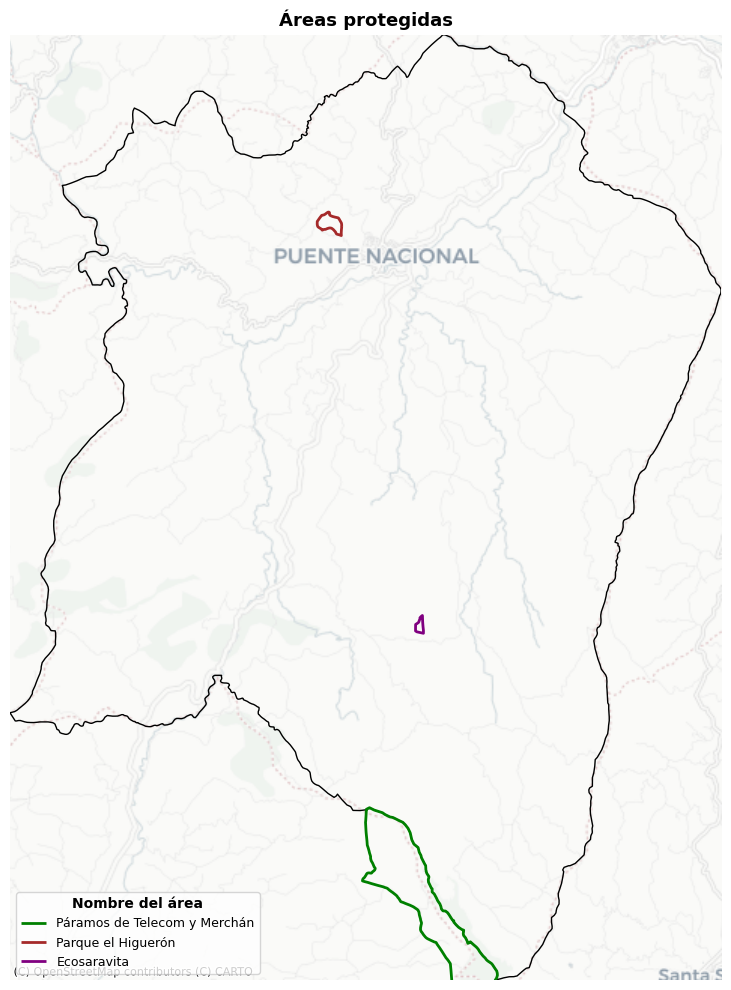

In [133]:
# Cargar y reproyectar datos
runap_sel = gpd.read_file("output/runap_mpio_3116.gpkg").to_crs(epsg=3857)
limite = gpd.read_file("data/puente_nacional_epsg3116.shp").to_crs(epsg=3857)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el límite del municipio
limite.boundary.plot(ax=ax, color="black", linewidth=1)

# Dibujar áreas protegidas con colores distintos
colores = ['green', 'brown', 'purple']
for i, row in runap_sel.iterrows():
    gdf_temp = gpd.GeoDataFrame(geometry=[row.geometry], crs=runap_sel.crs)
    gdf_temp.boundary.plot(
        ax=ax,
        color=colores[i % len(colores)],
        linewidth=2,
        label=row["ap_nombre"]
    )

# Añadir basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Ajustar vista centrada en el municipio
ax.set_xlim(limite.total_bounds[0], limite.total_bounds[2])
ax.set_ylim(limite.total_bounds[1], limite.total_bounds[3])

# Título 
ax.set_title("Áreas protegidas", fontsize=13, fontweight='bold')
ax.axis("off")

# Leyenda 
legend = ax.legend(
    title="Nombre del área",
    title_fontsize=10,
    loc="lower left",
    frameon=True,
    fontsize=9
)
plt.setp(legend.get_title(), weight='bold') 

plt.tight_layout()
plt.show

A partir del análisis de cobertura, se evidencia que el área protegida **Páramos de Telecom y Merchán** representa la mayor restricción espacial dentro del municipio de Puente Nacional, con una extensión de **2.107,64 hectáreas**, equivalentes al **8,37 %** del total del territorio municipal. En contraste, las otras dos figuras **Parque el Higuerón** y **Ecosaravita** tienen una incidencia significativamente menor, con proporciones inferiores al 0,1 %.

Este resultado resalta el peso territorial que puede tener una sola figura de conservación en la toma de decisiones espaciales, especialmente cuando se trata de áreas bajo **protección regional**, como es el caso de los páramos.

##### 1.5.1.2. Proximidad de áreas protegidas a infraestructura energética existente

Además del análisis de cobertura territorial, resulta pertinente evaluar la proximidad entre las áreas protegidas y las líneas de transmisión eléctrica existentes, ya que esta relación puede representar zonas de potencial conflicto normativo o puntos críticos de intervención.

Este cruce espacial permite anticipar situaciones en las que las trazas actuales atraviesan o bordean figuras de conservación ambiental, lo cual podría implicar la necesidad de reubicación, rediseño técnico o gestión interinstitucional. También puede ayudar a priorizar zonas donde los corredores actuales no interfieren con restricciones, facilitando su aprovechamiento en nuevas proyecciones.

En este apartado se calcula la distancia mínima entre cada polígono de área protegida y la infraestructura energética licenciada, con el fin de identificar patrones de cercanía o aislamiento espacial.

In [135]:
# Cargar capas necesarias (todas ya en EPSG:3116)
runap = gpd.read_file("output/runap_mpio_3116.gpkg")
lineas_lic = gpd.read_file("output/lineas_licenciadas_mpio_3116.gpkg")
lineas_upme = gpd.read_file("output/lineas_upme_mpio_3116.gpkg")

# Calcular distancia mínima a cada red
runap["dist_km_lic"] = runap.geometry.apply(lambda g: lineas_lic.distance(g).min() / 1000).round(2)
runap["dist_km_upme"] = runap.geometry.apply(lambda g: lineas_upme.distance(g).min() / 1000).round(2)

# Crear tabla resumen ordenada
tabla_dist = runap[["ap_nombre", "ap_categor", "dist_km_lic", "dist_km_upme"]].copy()
tabla_dist.columns = ["Nombre del área", "Categoría", 
                      "Distancia a líneas licenciadas (km)",
                      "Distancia a líneas UPME (km)"]
tabla_dist = tabla_dist.sort_values(by="Distancia a líneas licenciadas (km)")

# Mostrar tabla
print("\nTabla de proximidad entre áreas protegidas y líneas de transmisión:\n")
display(tabla_dist)


Tabla de proximidad entre áreas protegidas y líneas de transmisión:



Nombre del área                                   Categoría  \
2                   Ecosaravita        Reserva Natural de la Sociedad Civil   
1            Parque el Higuerón  Reservas Forestales Protectoras Nacionales   
0  Páramos de Telecom y Merchán  Reservas Forestales Protectoras Regionales   

   Distancia a líneas licenciadas (km)  Distancia a líneas UPME (km)  
2                                 1.19                          3.61  
1                                 1.90                          2.04  
0                                 2.99                          3.18

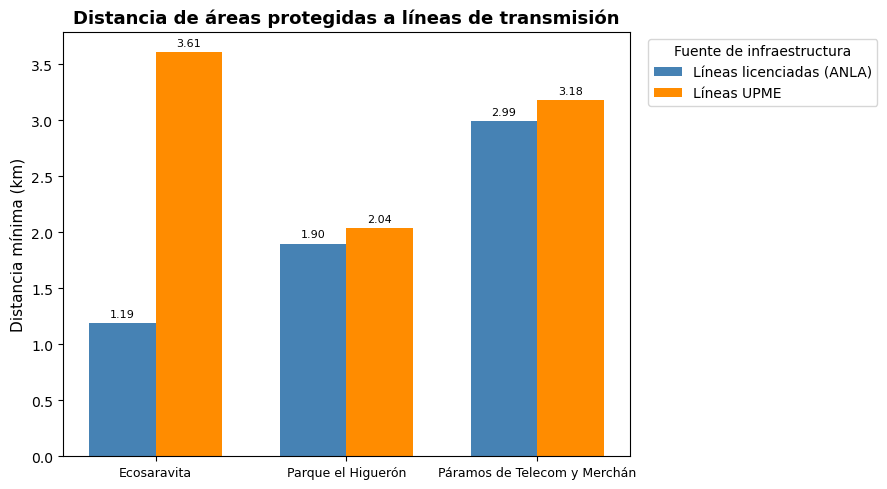

In [144]:
# Tabla base
df = tabla_dist.copy()

# Datos para el gráfico
labels = df["Nombre del área"]
lic = df["Distancia a líneas licenciadas (km)"]
upme = df["Distancia a líneas UPME (km)"]

x = range(len(labels))  # Posiciones en eje X
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(9, 5))  # Ancho mayor

# Barras
bars1 = ax.bar([p - width/2 for p in x], lic, width, label='Líneas licenciadas (ANLA)', color='steelblue')
bars2 = ax.bar([p + width/2 for p in x], upme, width, label='Líneas UPME', color='darkorange')

# Etiquetas y diseño
ax.set_ylabel('Distancia mínima (km)', fontsize=11)
ax.set_title('Distancia de áreas protegidas a líneas de transmisión', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=360, ha='center', fontsize=9)

# Leyenda fuera del gráfico
ax.legend(title='Fuente de infraestructura', bbox_to_anchor=(1.02, 1), loc='upper left')

# Añadir valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Ajustar espacio inferior
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

#### Discusión sobre la proximidad entre áreas protegidas y líneas de transmisión

Los resultados obtenidos muestran una clara proximidad entre las áreas protegidas presentes en el municipio de Puente Nacional y las infraestructuras de transmisión eléctrica, tanto licenciadas como proyectadas (UPME). La reserva **Ecosaravita** se ubica a tan solo 1.19 km de una línea licenciada y a 3.61 km de una línea UPME, siendo la más próxima en términos de infraestructura existente. Por su parte, el **Parque el Higuerón** presenta una distancia inferior a 2 km respecto a las líneas licenciadas, lo cual plantea riesgos potenciales sobre su categoría de conservación.

La representación gráfica permite visualizar de forma comparativa estas distancias mínimas, evidenciando que todas las áreas protegidas se encuentran dentro de un rango inferior a los 4 km de distancia respecto a al menos una infraestructura de transmisión. Esta cercanía puede implicar tensiones entre los objetivos de conservación ambiental y los proyectos de expansión energética, especialmente en contextos de planificación territorial que no integran criterios ecológicos.

Este análisis exploratorio sugiere la necesidad de incorporar zonas de amortiguamiento o estudios de impacto acumulativo en la toma de decisiones relacionadas con nuevos desarrollos de infraestructura eléctrica.

## 2. Rasterización de capas vectoriales

Con el fin de realizar análisis espaciales basados en celdas, las capas vectoriales deben ser convertidas a formato ráster. Esta transformación asegura la homogeneidad espacial entre los distintos criterios y permite su integración en la evaluación multicriterio. En esta sección se llevan a cabo las siguientes operaciones clave:

- **Carga de parámetros de referencia:**  
  Se utiliza el Modelo de Elevación Digital (DEM) reproyectado como referencia espacial. A partir de él se extraen la matriz de transformación afín (affine transform), el sistema de referencia de coordenadas (CRS), y la dimensión de salida (output shape). Estos parámetros aseguran que todos los rásteres generados compartan resolución, extensión y alineación espacial.

- **Definición de una función genérica de rasterización:**  
  Se implementa una función reusable `rasterise_layer()`, que convierte cualquier capa vectorial en un raster binario. La función asigna un valor de `1` a las celdas que contienen geometría válida y `0` al resto, replicando la resolución y el encuadre del DEM.

- **Aplicación de la función a las capas vectoriales:**  
  Se rasterizan las siguientes capas:

  | Capa vectorial             | Descripción                                     | Rol en SMCE                         |
  |----------------------------|-------------------------------------------------|-------------------------------------|
  | **Drenajes**               | Red hidrográfica principal                      | Barrera natural a evitar            |
  | **Red vial**               | Infraestructura lineal para conectividad        | Referente de viabilidad técnica     |
  | **Líneas licenciadas**     | Infraestructura eléctrica aprobada por ANLA     | Referente técnico / criterio de cercanía |
  | **Áreas protegidas**       | Figuras de conservación (RUNAP)                | Restricción normativa excluyente    |
  | **Centros poblados**       | Núcleos urbanos y rurales                       | Indicador de cercanía / lejanía     |
  | **Cobertura y biomas**     | Unidades ecológicas y uso del suelo             | Variable reclasificada por aptitud  |

Estas capas rasterizadas constituyen la entrada básica para los pasos posteriores del análisis multicriterio, como el cálculo de distancias, estandarización y superposición ponderada.



### 2.1. Carga de parámetros de referencia

Antes de proceder con la rasterización de capas vectoriales, es fundamental establecer un sistema de referencia común que garantice la coherencia espacial entre todas las capas. Para ello, se toma como base el Modelo de Elevación Digital (DEM) del municipio de Puente Nacional, previamente reproyectado a EPSG:3116.

A partir del DEM se extraen tres parámetros esenciales:

- **Transformación afín (`transform`)**: define cómo se mapea el sistema de coordenadas al espacio de celdas raster.
- **Sistema de referencia de coordenadas (`crs`)**: asegura que todos los rásteres compartan la misma proyección.
- **Dimensiones (`shape`)**: determina el tamaño (número de filas y columnas) del raster de salida.

Estos parámetros se utilizarán como referencia para rasterizar todas las capas vectoriales, permitiendo que coincidan en extensión, resolución y ubicación espacial. Este paso garantiza que los resultados del análisis multicriterio sean válidos y comparables entre criterios.


In [156]:
# Ruta DEM reproyectado
dem_path = "data/dem_puente_nacional_epsg3116.tif"

# Cargar el DEM para extraer parámetros de referencia
with rasterio.open(dem_path) as src:
    reference_transform = src.transform
    reference_crs = src.crs
    reference_shape = (src.height, src.width)

# Mostrar los parámetros extraídos
print("Transformación afín (affine):", reference_transform)
print("Sistema de referencia de coordenadas (CRS):", reference_crs)
print("Dimensiones del raster (alto, ancho):", reference_shape)

Transformación afín (affine): | 30.74, 0.00, 1034834.32|
| 0.00,-30.74, 1147227.37|
| 0.00, 0.00, 1.00|
Sistema de referencia de coordenadas (CRS): EPSG:3116
Dimensiones del raster (alto, ancho): (774, 587)


### 2.2. Función genérica de rasterización

Una vez definidos los parámetros espaciales de referencia, se procede a la implementación de una función genérica que permita rasterizar cualquier capa vectorial del modelo multicriterio. Esta función, denominada `rasterizar_capa`, toma como entrada un `GeoDataFrame` y devuelve un ráster binario alineado con el DEM base del municipio. Las geometrías válidas reciben un valor de 1, mientras que las áreas restantes se rellenan con 0.

Esta herramienta facilita la estandarización del proceso de conversión vector → ráster para criterios como drenajes, centros poblados, áreas protegidas, biomas, coberturas del suelo y red vial, asegurando consistencia espacial y compatibilidad en pasos posteriores del análisis SMCE.


In [160]:
def rasterizar_capa(gdf, transform, out_shape, crs):
    """
    Convierte un GeoDataFrame en un raster binario alineado con el DEM de referencia.

    Parámetros:
    - gdf: GeoDataFrame con geometrías a rasterizar.
    - transform: transformación afín del raster de referencia (e.g. del DEM).
    - out_shape: tupla (alto, ancho) del raster de salida.
    - crs: sistema de referencia de coordenadas (EPSG) del raster de referencia.

    Retorna:
    - numpy array (raster binario) con valores 1 para geometrías y 0 para el resto.
    """
    # Asegurar que la capa esté en el CRS correcto
    if gdf.crs != crs:
        gdf = gdf.to_crs(crs)

    # Crear el raster binario (1 donde hay geometría, 0 en el resto)
    raster = rasterize(
        [(geom, 1) for geom in gdf.geometry if geom is not None],
        out_shape=out_shape,
        transform=transform,
        fill=0,
        dtype='uint8'
    )

    return raster

### 2.3. Rasterización de capas vectoriales no categóricas

Con los parámetros espaciales de referencia establecidos, se procede a rasterizar las capas vectoriales que participan en el análisis multicriterio. Esta transformación garantiza que cada capa pueda integrarse en operaciones de álgebra de mapas y análisis de superposición espacial.

En este paso se aplica la función `rasterizar_capa()` a un conjunto de capas clave que representan diferentes dimensiones del análisis (ambiental, social, técnico y de restricción). Cada capa será convertida a una grilla binaria con celdas de valor **1** donde hay presencia de la entidad y **0** donde no la hay.

La rasterización se ejecuta en bloque para todas las capas vectoriales, asegurando consistencia espacial en términos de extensión, resolución y sistema de referencia.

In [169]:
# Ruta corregida al DEM de referencia
dem_path = "data/dem_puente_nacional.tif"

with rasterio.open(dem_path) as dem_src:
    transform = dem_src.transform
    crs = dem_src.crs
    shape = (dem_src.height, dem_src.width)

# Diccionario de capas vectoriales a rasterizar
layers_to_rasterize = {
    "output/drenajes_recortados/drenaje_sencillo_buffer1km.gpkg": "output/raster_drenaje_sencillo.tif",
    "output/drenajes_recortados/drenaje_doble_buffer1km.gpkg": "output/raster_drenaje_doble.tif",
    "output/lineas_licenciadas_mpio_3116.gpkg": "output/raster_lineas_lic.tif",
    "output/lineas_upme_mpio_3116.gpkg": "output/raster_lineas_upme.tif",
    "output/red_vial_buffer1km.gpkg": "output/raster_vial.tif",
    "output/centros_poblados_mpio_3116.gpkg": "output/raster_cp.tif",
    "output/runap_mpio_3116.gpkg": "output/raster_runap.tif"
}

# Función de rasterización
def rasterize_layer(vector_path, output_path, transform, shape, crs):
    gdf = gpd.read_file(vector_path).to_crs(crs)
    shapes = ((geom, 1) for geom in gdf.geometry if geom is not None)
    raster = rasterize(shapes=shapes, out_shape=shape, transform=transform, fill=0, dtype="uint8")
    with rasterio.open(
        output_path,
        'w',
        driver='GTiff',
        height=shape[0],
        width=shape[1],
        count=1,
        dtype=raster.dtype,
        crs=crs,
        transform=transform,
    ) as dst:
        dst.write(raster, 1)

# Ejecutar rasterización para todas las capas
for vector_path, output_path in layers_to_rasterize.items():
    rasterize_layer(vector_path, output_path, transform, shape, crs)

print("✅ Rasterización finalizada con éxito para todas las capas.")

✅ Rasterización finalizada con éxito para todas las capas.


### 2.4. Rasterización de capas vectoriales categóricas

A diferencia de las capas binarias que indican simplemente la presencia o ausencia de un fenómeno, algunas capas vectoriales contienen información categórica que representa diferentes tipos de coberturas o unidades ecológicas. En el contexto del análisis multicriterio espacial (SMCE), estas categorías deben conservarse para permitir su reclasificación posterior según su nivel de aptitud o impacto.

En esta sección se abordan dos capas principales:

- **Coberturas del suelo**: contiene clases como bosques, áreas agrícolas, cuerpos de agua o tejido urbano, cada una con implicaciones distintas para la localización de proyectos energéticos.
- **Biomas y ecosistemas**: representa unidades ecológicas diferenciadas, relevantes para criterios de conservación o sensibilidad ambiental.

Para asegurar consistencia espacial, ambas capas se rasterizan utilizando los parámetros del DEM como referencia (transformación afín, CRS y dimensiones), asignando valores únicos a cada clase identificada.

#### 2.4.1. Rasterización de Coberturas

La capa de coberturas del suelo representa diferentes usos y formas del terreno dentro del municipio de Puente Nacional, como bosques, pastos, zonas agrícolas, áreas urbanas o cuerpos de agua. Estas categorías tienen un impacto diferencial en la evaluación de aptitud territorial: por ejemplo, la infraestructura energética puede ser menos compatible con zonas de bosque denso o cuerpos de agua que con áreas transformadas o urbanizadas.

Dado que esta variable contiene información categórica, no se rasteriza como una capa binaria, sino manteniendo los valores únicos de la columna de clasificación (`codigo` en este caso). Este enfoque permite preservar la diversidad de coberturas, facilitando su posterior reclasificación a escalas de aptitud o exclusión dentro del modelo multicriterio.

En esta sección se procederá a:

- Verificar las clases únicas presentes en la capa.
- Rasterizar la capa de coberturas utilizando el valor de categoría (`codigo`) como valor del ráster.
- Guardar el resultado como archivo `.tif` para su uso en fases posteriores del análisis.

In [184]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from shapely.geometry import box
import numpy as np

# Rutas
vector_path = "output/cobertura_puente_buffer1km.gpkg"
output_raster_path = "output/raster_cobertura.tif"
dem_path = "data/dem_puente_nacional.tif"

# Cargar DEM de referencia
with rasterio.open(dem_path) as dem_src:
    transform = dem_src.transform
    crs = dem_src.crs
    shape = (dem_src.height, dem_src.width)

# Bbox del DEM
bbox_dem = box(*[transform[2], transform[5] + shape[0]*transform[4], 
                 transform[2] + shape[1]*transform[0], transform[5]])

# Cargar cobertura y filtrar
gdf = gpd.read_file(vector_path).to_crs(crs)
gdf = gdf[gdf.geometry.notnull() & gdf["codigo"].notnull() & gdf.geometry.is_valid]
gdf = gdf[gdf.geometry.intersects(bbox_dem)]
gdf["codigo"] = gdf["codigo"].astype("uint16")  # Asegurar tipo correcto

# Rasterizar por código
shapes = [(geom, value) for geom, value in zip(gdf.geometry, gdf["codigo"])]
raster = rasterize(
    shapes=shapes,
    out_shape=shape,
    transform=transform,
    fill=0,
    dtype="uint16"
)

# Guardar a disco
with rasterio.open(
    output_raster_path,
    'w',
    driver='GTiff',
    height=shape[0],
    width=shape[1],
    count=1,
    dtype=raster.dtype,
    crs=crs,
    transform=transform,
) as dst:
    dst.write(raster, 1)

print("✅ Rasterización categórica de cobertura completada correctamente.")

✅ Rasterización categórica de cobertura completada correctamente.


#### 2.4.2. Rasterización de Biomas

Los biomas representan unidades ecológicas clave para el análisis espacial, ya que expresan la diversidad ambiental del territorio con base en criterios de vegetación, clima y relieve. En este caso, se utiliza la clasificación propuesta por el Instituto Alexander von Humboldt, contenida en el campo `bioma_IAvH` de la capa de entrada.

Dado que este campo es de tipo categórico (texto), se procede a su conversión en variables numéricas mediante la asignación de un código único a cada categoría. Esta transformación permite la rasterización de los polígonos de biomas conservando su diferenciación tipológica.

In [185]:
# Cargar capa de biomas
biomas = gpd.read_file("output/biomas_puente_3116.gpkg").to_crs(crs)

# Convertir bioma_IAvH a códigos numéricos
biomas["bioma_code"] = biomas["bioma_IAvH"].astype("category").cat.codes

# Crear tuplas (geometría, valor) para rasterización
shapes = [(geom, value) for geom, value in zip(biomas.geometry, biomas["bioma_code"]) if geom is not None]

# Rasterizar
raster_biomas = rasterize(
    shapes=shapes,
    out_shape=shape,
    transform=transform,
    fill=0,
    dtype="uint8"
)

# Guardar como archivo GeoTIFF
with rasterio.open(
    "output/raster_biomas.tif",
    'w',
    driver='GTiff',
    height=shape[0],
    width=shape[1],
    count=1,
    dtype="uint8",
    crs=crs,
    transform=transform
) as dst:
    dst.write(raster_biomas, 1)

print("✅ Rasterización de biomas completada con éxito.")

✅ Rasterización de biomas completada con éxito.


### 2.5. Visualización de capas rasterizadas

Con el fin de verificar la correcta alineación espacial y extensión de las capas rasterizadas, esta sección presenta una visualización comparativa de los resultados obtenidos. Las salidas se grafican con coordenadas reales (EPSG:3116) y una grilla en metros, lo cual facilita la lectura espacial y la comparación entre variables.

Se incluyen las siguientes capas:

- Red vial
- Drenajes
- Centros poblados
- Áreas protegidas (RUNAP)
- Líneas licenciadas
- Cobertura y biomas

Esta visualización constituye una validación preliminar antes de los pasos de reclasificación, estandarización y combinación multicriterio.

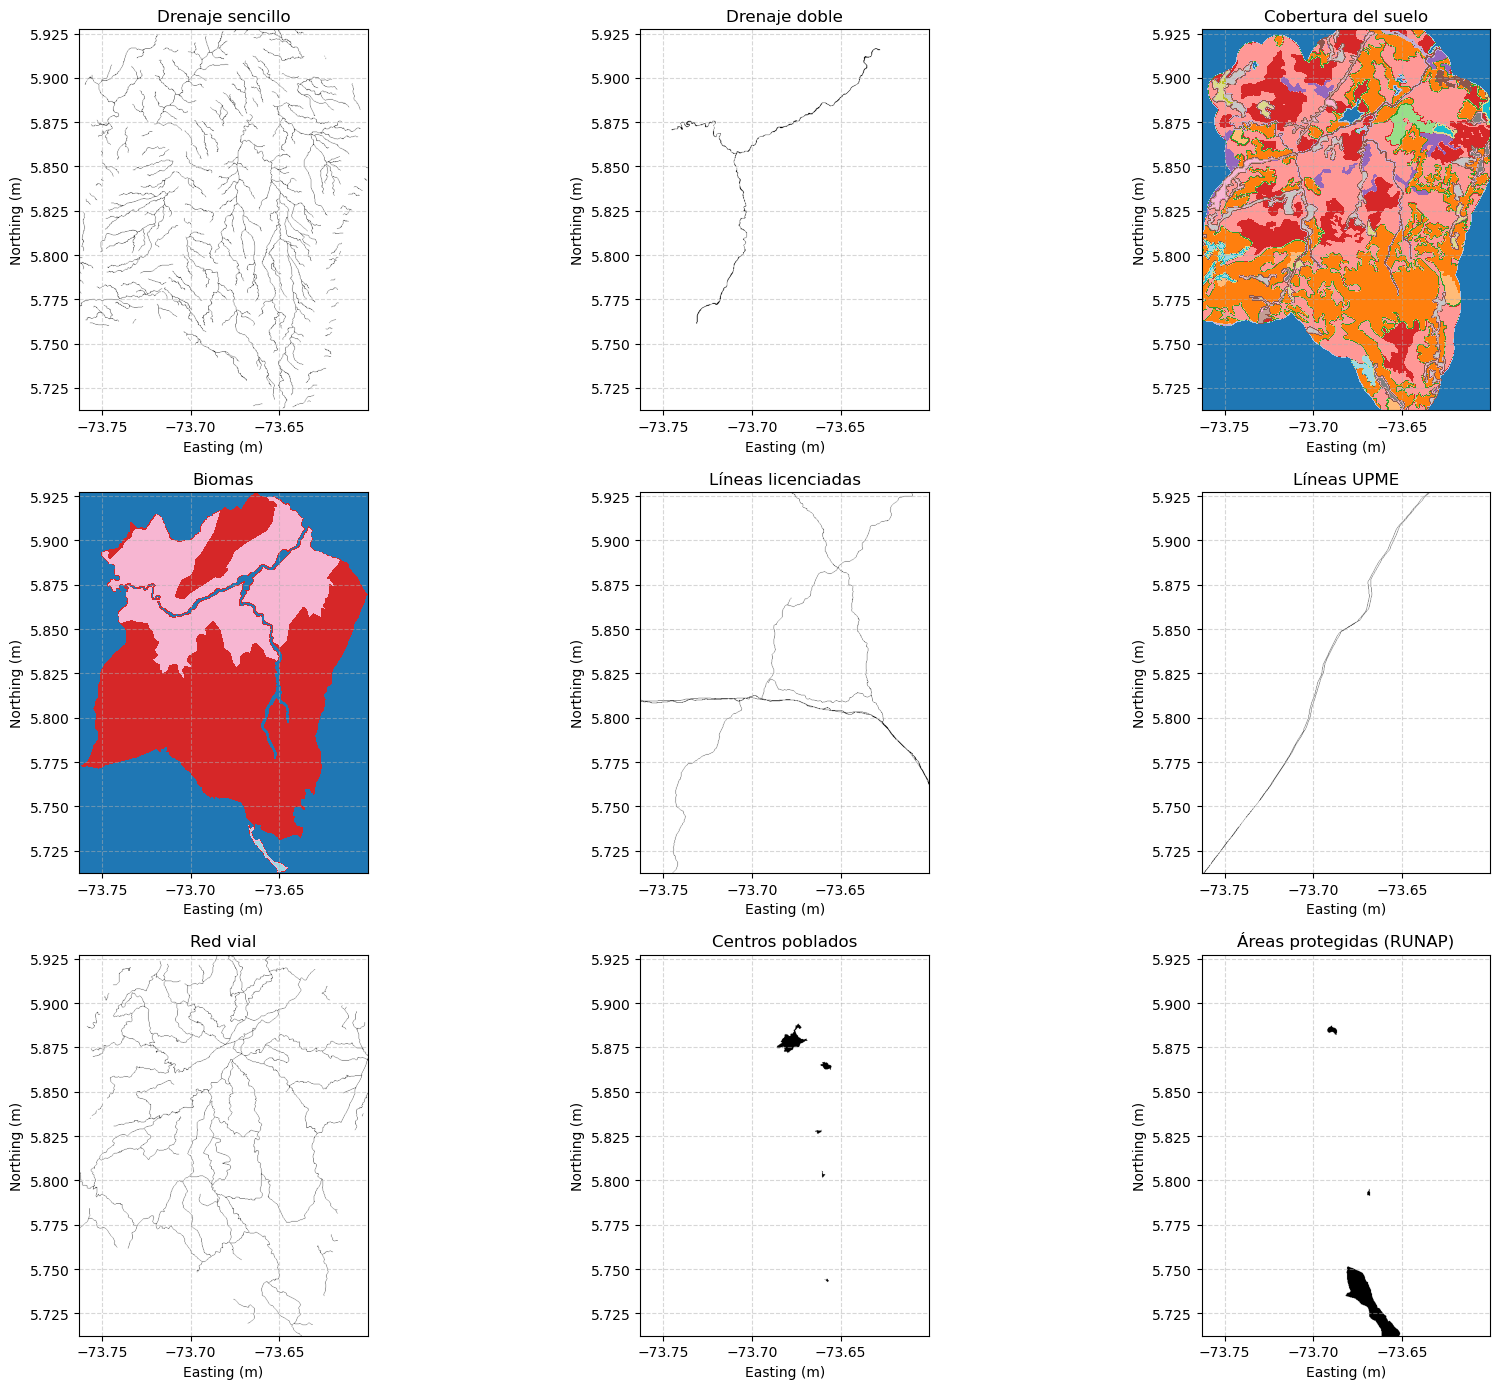

In [189]:
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
from matplotlib.colors import BoundaryNorm
import rasterio
import numpy as np

# Lista de rutas y títulos
raster_paths = [
    ("output/raster_drenaje_sencillo.tif", "Drenaje sencillo"),
    ("output/raster_drenaje_doble.tif", "Drenaje doble"),
    ("output/raster_cobertura.tif", "Cobertura del suelo"),
    ("output/raster_biomas.tif", "Biomas"),
    ("output/raster_lineas_lic.tif", "Líneas licenciadas"),
    ("output/raster_lineas_upme.tif", "Líneas UPME"),
    ("output/raster_vial.tif", "Red vial"),
    ("output/raster_cp.tif", "Centros poblados"),
    ("output/raster_runap.tif", "Áreas protegidas (RUNAP)")
]

# Crear figura
fig, axs = plt.subplots(3, 3, figsize=(18, 14), dpi=100)
axs = axs.flatten()

# Cargar cada capa raster y graficarla con fondo blanco
for i, (path, title) in enumerate(raster_paths):
    with rasterio.open(path) as src:
        raster_data = src.read(1)
        extent = plotting_extent(src)

        # Visualización especial para capas categóricas
        if "cobertura" in path or "biomas" in path:
            unique_vals = np.unique(raster_data)
            unique_vals = unique_vals[unique_vals != 0]
            cmap = plt.get_cmap("tab20", len(unique_vals))
            norm = BoundaryNorm(boundaries=np.append(unique_vals, unique_vals[-1]+1), ncolors=cmap.N)
            axs[i].imshow(raster_data, cmap=cmap, norm=norm, extent=extent, origin="upper")
        else:
            axs[i].imshow(raster_data, cmap='Greys', extent=extent, origin='upper')

        axs[i].set_title(title)
        axs[i].set_xlabel("Easting (m)")
        axs[i].set_ylabel("Northing (m)")
        axs[i].grid(True, linestyle='--', alpha=0.5)
        axs[i].set_facecolor("white")

plt.tight_layout()
plt.show()

### 2.6. Guardar capas rasterizadas en disco

Todas las capas vectoriales utilizadas en el análisis multicriterio han sido rasterizadas con una resolución, extensión espacial y sistema de referencia uniforme, derivados del DEM de referencia del municipio de Puente Nacional (EPSG:3116). Esto garantiza la compatibilidad espacial entre los distintos insumos utilizados en la construcción de matrices y modelos de decisión espacial.

A continuación, se imprimen las dimensiones (número de filas y columnas) de las capas rasterizadas no categóricas:

In [192]:
# Cargar y mostrar dimensiones de los raster binarios (no categóricos)
import rasterio

print("🗺 Dimensiones de capas rasterizadas (filas, columnas):\n")

for ruta, nombre in [
    ("output/raster_drenaje_sencillo.tif", "Drenaje sencillo"),
    ("output/raster_drenaje_doble.tif", "Drenaje doble"),
    ("output/raster_vial.tif", "Red vial"),
    ("output/raster_lineas_lic.tif", "Líneas licenciadas"),
    ("output/raster_lineas_upme.tif", "Líneas UPME"),
    ("output/raster_cp.tif", "Centros poblados"),
    ("output/raster_runap.tif", "Áreas protegidas (RUNAP)"),
    ("output/raster_biomas.tif", "Biomas"),
    ("output/raster_cobertura.tif", "Coberturas de la tierra")
]:
    with rasterio.open(ruta) as src:
        print(f"{nombre:<25}: {src.shape}")

🗺 Dimensiones de capas rasterizadas (filas, columnas):

Drenaje sencillo         : (774, 586)
Drenaje doble            : (774, 586)
Red vial                 : (774, 586)
Líneas licenciadas       : (774, 586)
Líneas UPME              : (774, 586)
Centros poblados         : (774, 586)
Áreas protegidas (RUNAP) : (774, 586)
Biomas                   : (774, 586)
Coberturas de la tierra  : (774, 586)


In [195]:
import rasterio

# Cargar los arrays desde archivos .tif (raster binarios y categóricos)
with rasterio.open("output/raster_drenaje_sencillo.tif") as src:
    drenaje_sencillo_raster = src.read(1)

with rasterio.open("output/raster_drenaje_doble.tif") as src:
    drenaje_doble_raster = src.read(1)

with rasterio.open("output/raster_vial.tif") as src:
    vial_raster = src.read(1)

with rasterio.open("output/raster_lineas_lic.tif") as src:
    lineas_lic_raster = src.read(1)

with rasterio.open("output/raster_lineas_upme.tif") as src:
    lineas_upme_raster = src.read(1)

with rasterio.open("output/raster_cp.tif") as src:
    cp_raster = src.read(1)

with rasterio.open("output/raster_runap.tif") as src:
    runap_raster = src.read(1)

with rasterio.open("output/raster_biomas.tif") as src:
    biomas_raster = src.read(1)

with rasterio.open("output/raster_cobertura.tif") as src:
    cobertura_raster = src.read(1)

# Función genérica para guardar rasters
def save_raster(array, path, meta, layer_name="Layer"):
    with rasterio.open(path, "w", **meta) as dst:
        dst.write(array, 1)
    print(f"✅ Guardado: {layer_name} → {path}")

# Guardar todas las capas raster
save_raster(drenaje_sencillo_raster, "output/raster_drenaje_sencillo.tif", raster_meta, "Drenaje sencillo")
save_raster(drenaje_doble_raster, "output/raster_drenaje_doble.tif", raster_meta, "Drenaje doble")
save_raster(vial_raster, "output/raster_vial.tif", raster_meta, "Red vial")
save_raster(lineas_lic_raster, "output/raster_lineas_lic.tif", raster_meta, "Líneas licenciadas")
save_raster(lineas_upme_raster, "output/raster_lineas_upme.tif", raster_meta, "Líneas UPME")
save_raster(cp_raster, "output/raster_cp.tif", raster_meta, "Centros poblados")
save_raster(runap_raster, "output/raster_runap.tif", raster_meta, "Áreas protegidas (RUNAP)")
save_raster(biomas_raster, "output/raster_biomas.tif", raster_meta, "Biomas")
save_raster(cobertura_raster, "output/raster_cobertura.tif", raster_meta, "Cobertura del suelo")

✅ Guardado: Drenaje sencillo → output/raster_drenaje_sencillo.tif
✅ Guardado: Drenaje doble → output/raster_drenaje_doble.tif
✅ Guardado: Red vial → output/raster_vial.tif
✅ Guardado: Líneas licenciadas → output/raster_lineas_lic.tif
✅ Guardado: Líneas UPME → output/raster_lineas_upme.tif
✅ Guardado: Centros poblados → output/raster_cp.tif
✅ Guardado: Áreas protegidas (RUNAP) → output/raster_runap.tif
✅ Guardado: Biomas → output/raster_biomas.tif
✅ Guardado: Cobertura del suelo → output/raster_cobertura.tif
